**Classification genes->STP model: train and test**

Notebook for comparison of different models of genes->stp parameters and type dependences with respect to generalization (including hierarhical models taking into account structure of transcriptomic space). Test MDL based regularization approaches

**Test GPU availability**

In [1]:
import torch
print('Number of gpus available: ',torch.cuda.device_count())
print('Name of gpu[0]: ',torch.cuda.get_device_name(0))
print('Cuda version : ',torch.version.cuda)

cuda0 = torch.device('cuda:0')

Number of gpus available:  1
Name of gpu[0]:  Tesla V100-SXM2-16GB
Cuda version :  10.2


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

**Import sklearn for alternative regression and classification approaches**

In [3]:
import sklearn as sk
from sklearn import linear_model
# Test ridge regression
reg = sk.linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

**Import module for genes->stp modeling**

In [4]:
#'/content/drive/My Drive/Colab Notebooks/'
do_colab_g2p = True
if do_colab_g2p == False:
    import genes2stp as g2p # last version
else:    
    import genes2stp_colab as g2p  # scripts from Google Colab

Select GPU device

**Load gene set for training  genes->STP model**

In [5]:
import os
print(os.getcwd())

#d5 = '/content/drive/My Drive/Colab Notebooks/'
d5 = ''
df_ge_names_filter = pd.read_excel(d5+'gene_set_names.xlsx',header=None).loc[1:,1]
df_ge_names_filter

/gpfs/bbp.cscs.ch/home/stepaniu/genes_STP_project/jan_2020


1        pre__Slit1
2        pre__Slit2
3        pre__Slit3
4        pre__Robo1
5        pre__Robo2
           ...     
1781    post__Galr1
1782    post__Galr2
1783    post__Galr3
1784    post__Elfn1
1785    post__Elfn2
Name: 1, Length: 1785, dtype: object

**Load the combined dataset of scDNA expression and STP in annotated synaptic pair types**

In [6]:
data_source=0
if True:
    gs_name = '_gs5188' #'_gs1512' #'_gs15656' #'_gs1512' #'_gs15656' #'_gs1512' #'_gs15656' #'_gs1512'   #'_gs5188' #'_gs1512'

    #d4 = '/content/drive/My Drive/Colab Notebooks/scVI/'
    d4 = ''

    fname_columns = d4+'stp_to_ge_all_columns'+gs_name+'.hdf'
    fname = d4+'stp_to_ge_all_data'+gs_name+'.hdf'

    # Load dataframe with cortex and hippocampus gene expression and stp data, as well as annotations and synaptic pair clustering information
    X_train0, ge_columns_train, annot_columns_train, stp_columns_train, classes_columns_train = \
    g2p.load_genes_and_stp(fname, fname_columns=fname_columns)

    print('X_train0 shape',X_train0.shape)
    #print(X_train0.columns[200:300])
    #print(X_train0.columns[300:])


    print('gs_name - '+gs_name)

    # add scVI latent factors names to ge_columns_train
    if (gs_name=='_gs5188')|(gs_name=='_gs1512')|(gs_name=='_gs15656'):
        nlf = 20   # 20 were in scvi model
    elif (gs_name=='_gs219'):
        nlf = 10   # 10 were in scvi model
    lf_names = np.arange(nlf).astype(str)
    lf_names1 =  ['pre__'+s for s in lf_names.tolist()]
    lf_names2 =  ['post__'+s for s in lf_names.tolist()]

    lf_scvi_names = lf_names1 + lf_names2

    ge_columns_train2 = list(set(ge_columns_train).difference(set(lf_scvi_names)))
    lf_scvi_names

if data_source==1: # additional stp classification data
    ##### gs_name = '_gs5188'
    gs_name = '_gs5188'
    
    do_load_bbp_types = True # load bbp stp types estimates columns
    
    DDn = 2 # reshapingcoefficient coefficient betwean X_addon and X_train 

    # Load hippocampus ge->STP dataframe
    import time
    do_load_temporary=1
    if do_load_temporary==1:
        t1=time.time()
        print('load ge_data_h...')
        ge_data_h = pd.read_hdf('ge_data_h'+gs_name+'.hdf',key='data')
        t2=time.time()
        print('Elapsed time ',t2-t1, ' s')
        print('load X_h...')
        t1=time.time()
        X_h = pd.read_hdf('X_h'+gs_name+'.hdf',key='data')
        t2=time.time()
        print('Elapsed time ',t2-t1, ' s')
        print('load y_h...')
        y_h = pd.read_hdf('y_h'+gs_name+'.hdf',key='data') 
        print('load annot_columns_h...')
        annot_columns_h=pd.read_excel('annot_columns_h'+gs_name+'.xlsx')
        print('load ge_columns_h...')
        ge_columns_h=pd.read_excel('ge_columns_h'+gs_name+'.xlsx')
        print('load stp_columns_h...')
        stp_columns_h=pd.read_excel('stp_columns_h'+gs_name+'.xlsx')

    # Load cortex ge->STP dataframe
    import time
    do_load_temporary=1
    if do_load_temporary==1:
        t1=time.time()
        print('load ge_data_c...')
        ge_data_c = pd.read_hdf('ge_data_c'+gs_name+'.hdf',key='data')
        t2=time.time()
        print('Elapsed time ',t2-t1, ' s')
        print('load X_c...')
        t1=time.time()
        X_c = pd.read_hdf('X_c'+gs_name+'.hdf',key='data')
        t2=time.time()
        print('Elapsed time ',t2-t1, ' s')
        print('load y_c...')
        y_c = pd.read_hdf('y_c'+gs_name+'.hdf',key='data') 
        print('load annot_columns_c...')
        annot_columns=pd.read_excel('annot_columns_c'+gs_name+'.xlsx')
        print('load ge_columns_c...')
        ge_columns=pd.read_excel('ge_columns_c'+gs_name+'.xlsx')
        print('load stp_columns_c...')
        stp_columns=pd.read_excel('stp_columns_c'+gs_name+'.xlsx')
        
        
    ge_columns_c = ge_columns.loc[:,0].values.ravel().tolist()
    #annot_columns = annot_columns.values.ravel().tolist()
    annot_columns = annot_columns.loc[:,0].values.ravel().tolist()
    stp_columns = stp_columns.loc[:,0].values.ravel().tolist()
    #y_c = y_c.values #to_numpy()
    #X_c = X_c.values #to_numpy()
    
    ge_columns_h = ge_columns_h.loc[:,0].values.ravel().tolist()
    annot_columns_h = annot_columns_h.loc[:,0].values.ravel().tolist()
    stp_columns_h = stp_columns_h.loc[:,0].values.ravel().tolist()
    #y_h = y_h.values #to_numpy()
    #X_h = X_h.values #to_numpy()
    
#     X = np.concatenate([X_c,X_h],axis=0)
#     ge_data_FD = pd.concat([ge_data_c,ge_data_h],axis=0)
#     y = np.concatenate([y_c,y_h],axis=0)
#     y = pd.DataFrame(y,columns=annot_columns + stp_columns) #.set_index()
#     X = pd.DataFrame(X[:,0:len(annot_columns)],columns=annot_columns) #.set_index()
#     X0addon = pd.concat([X,y,ge_data_FD],axis=1)
    
    if do_load_bbp_types:
        X0addon2= pd.read_excel('all_bbp_types.xlsx').drop(columns=['Unnamed: 0', 'index', 'index.1'])
        #X0addon.loc[0::100,['level_0', 'Unnamed: 0', 'index', 'index.1','index_ds']]
        
        bbp_columns = ['stp_type_objective','bbp_plane','bbp_100','bbp_250','bbp_500']
        stp_par_columns = ['tF', 'p0','tD', 'dp', 'A', 'A1', 'A2', 'tDmin', 'dd', 't_FDR', 't_SMR', 
                           'dp0', 'dp/p0', 'tF_100.0', 'tD_100.0', 'tF_250.0', 'tD_250.0', 'tF_500.0', 'tD_500.0']
        all_columns = annot_columns+stp_columns+['tF','tD']
        X0addon = pd.concat([ge_data_c.loc[:,all_columns],ge_data_h.loc[:,all_columns]],axis=0).reset_index()
        X0addon = pd.concat([X0addon,X0addon2],axis=1)
    else:
        all_columns = annot_columns+stp_columns+['tF','tD']
        X0addon = pd.concat([ge_data_c.loc[:,all_columns],ge_data_h.loc[:,all_columns]],axis=0)

    
    print('X0addon ',X0addon.head())
    X0addon=X0addon.iloc[::DDn,:].reset_index()
    print('X0addon DDn reshaped',X0addon.head())
    
    print('X_train0.shape : ',X_train0.shape)
    print('X0addon.shape : ',X0addon.shape)


    print('X_train0 index data sets  ',X_train0.loc[0:600:100,'index_ds'])
    print('X0addon index data sets   ',X0addon.iloc[0:600:100,:].loc[:,['index_ds']])
    
    X_train0 = X_train0.drop(columns=stp_columns_train)
    
    X_train0 = pd.concat([X_train0,X0addon],axis=1)
    classes_columns_train = classes_columns_train + ['tF','tD']
    
    print('X_train0 new concatenated with X0addon')
    X_train0 = X_train0.loc[:,~X_train0.columns.duplicated()] # remove duplicated columns
    
    print(X_train0.loc[::100,annot_columns+['tF','tD']])

        
#Add classification columns
#### modify classification data: DO class_pre, class_post, subclass_pre, subclass_post etc. columns
subcl_names_pre = ['ex_ctx__pre', 'ex_ec__pre','ex_hipp__pre','sst__pre','pvalb__pre','cge__pre']
subcl_names_post = ['ex_ctx__post', 'ex_ec__post','ex_hipp__post','sst__post','pvalb__post','cge__post']
subcl_names_pre_b = ['ex_ctx__pre', 'ex_ec__pre','ex_hipp__pre','inh__pre']
subcl_names_pre_d = ['ex_ctx__pre', 'ex_ec__pre','ex_hipp__pre','sst__pre','pvalb__pre','vip__pre','cck__pre','lamp5__pre']
subcl_names_post_c = ['ex__post','sst__post','pvalb__post','cge__post']
subcl_names_pre_c = ['ex__pre','sst__pre','pvalb__pre','cge__pre']
subcl_names_post_b = ['ex_ctx__post', 'ex_ec__post','ex_hipp__post','inh__post']
new_syntype_columns = pd.DataFrame([['class_pre',['ex__pre', 'inh__pre'], ['Glutamatergic', 'GABAergic']],
                                    ['subclass_pre',subcl_names_pre, subcl_names_pre],
                                    ['subclass_pre_b',subcl_names_pre_b, subcl_names_pre_b],
                                    ['subclass_pre_d',subcl_names_pre_d, subcl_names_pre_d],
                                    ['subclass_post_c',subcl_names_post_c, subcl_names_post_c],
                                    ['subclass_pre_c',subcl_names_pre_c, subcl_names_pre_c],
                                    ['subclass_post_b',subcl_names_post_b, subcl_names_post_b],
                                    ['class_post',['ex__post', 'inh__post'], ['Glutamatergic', 'GABAergic']],
                                    ['subclass_post',subcl_names_post, subcl_names_post]], columns = ['group','columns_X0','new_names'])

X_train0, classes_columns_train = g2p.add_class_hierarchy(new_syntype_columns,X_train0,classes_columns_train)

# add smallest synaptic pairs clusters : 
classes_columns_train = classes_columns_train + ['index_ds']

print('classes_columns_train : ',classes_columns_train)
print('annot_columns_train : ',annot_columns_train)

X_train0 shape (9300, 1774)
gs_name - _gs5188
classes_columns_train :  ['ex__pre', 'ex__post', 'inh__pre', 'inh__post', 'ex_ctx__pre', 'ex_ctx__post', 'ex_ec__pre', 'ex_ec__post', 'ex_hipp__pre', 'ex_hipp__post', 'mge__pre', 'mge__post', 'cge__pre', 'cge__post', 'pvalb__pre', 'pvalb__post', 'sst__pre', 'sst__post', 'lamp5__pre', 'lamp5__post', 'vip__pre', 'vip__post', 'cck__pre', 'cck__post', 'vse__pre', 'vse__post', 'vse__post', 'class_pre', 'subclass_pre', 'subclass_pre_b', 'subclass_pre_d', 'subclass_post_c', 'subclass_pre_c', 'subclass_post_b', 'class_post', 'subclass_post', 'index_ds']
annot_columns_train :  ['cell_type2_pre', 'cell_type2_post', 'layer_pre', 'layer_post', 'cre_line_pre', 'cre_line_post', 'index_ds', 'samples_pre', 'samples_post']


**Reload genes2stp module**

In [9]:
import importlib
importlib.reload(g2p)

<module 'genes2stp_colab' from '/gpfs/bbp.cscs.ch/home/stepaniu/genes_STP_project/jan_2020/genes2stp_colab.py'>

**Estimate probability of objective stp types from genes_STP data**

In [10]:
# do_probab_y :probabilities of synapse stp type based on predictors
stp_n=['A2_20Hz', 'A5_20Hz']
N_bootstraps = 100
Dn=1
probab_yo, y_syntpo, samples_probab_y2o = g2p.do_probab_y(X_train0, N_bootstraps=N_bootstraps, Dn=1, stp_n=stp_n, 
                classes_columns_train=classes_columns_train)
samples_probab_y2 = samples_probab_y2o
print(y_syntpo.shape)
print(probab_yo.shape)
print("probability for each synaptic pair type to be assigned to the 1st (depressing) or 2nd (facilitating) objective STP class (first 20 spt): ", probab_yo[0:20])


(9300, 1)
(93, 2)
probability for each synaptic pair type to be assigned to the 1st (depressing) or 2nd (facilitating) objective STP class (first 20 spt):  [[0.84 0.16]
 [0.84 0.16]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.71 0.29]
 [1.   0.  ]
 [0.37 0.63]
 [0.02 0.98]
 [0.41 0.59]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.48 0.52]
 [0.38 0.62]
 [1.   0.  ]]


**Do data preprocessing - selection of gene set and sampled spt for training, Normalization an scaling of STP data**

In [11]:
do_bbp_types = False 
if do_bbp_types:
    N_bootstraps=100
    Dn=5
    #stp_n=['A2_20Hz', 'A5_20Hz']
    stp_n=['A2_20Hz','A5_20Hz','A250_20Hz','A2_50Hz', 'A5_50Hz', 'A2_10Hz', 'A5_10Hz']
    #stp_n=['A2_20Hz', 'A5_20Hz','A2_50Hz', 'A5_50Hz']
    bbp_n = ['bbp_100']

    probab_dict = { 'probab_y2':probab_y, 'y2_syntp':y_syntp}
else:
    N_bootstraps=100
    Dn=5
    stp_n=['A2_20Hz', 'A5_20Hz']
    #stp_n=['A2_20Hz','A5_20Hz','A250_20Hz','A2_50Hz', 'A5_50Hz', 'A2_10Hz', 'A5_10Hz']
    #stp_n=['A2_20Hz', 'A5_20Hz','A2_50Hz', 'A5_50Hz']
    #bbp_n = ['bbp_100']

    probab_dict = { 'probab_y2':probab_yo, 'y2_syntp':y_syntpo}

Dn2 = int(N_bootstraps/Dn)

X2, y2, X2_cl, X2_an, sts, preprocessing_, cla_n2 = \
g2p.data_preprocessing(X_train0, N_bootstraps=N_bootstraps, Dn=Dn, stp_n=stp_n,
                       classes_columns_train=classes_columns_train, ge_columns_train=ge_columns_train, annot_columns_train=annot_columns_train,
                       df_ge_names_filter=df_ge_names_filter,lf_scvi_names=lf_scvi_names,
                       remove_st=[4,90],do_normalize = 1, do_log_y = 1, d_log=0.3, probab_dict=probab_dict)
#probab_dict = { 'probab_y2':preprocessing_['probab_y2'], 'y2_syntp':preprocessing_['y2_syntp']}
print('X2 shape : ',X2.shape)
print('y2 shape : ',y2.shape)
print('X2_an : ',X2_an.shape)
print('X2_cl : ',X2_cl.shape)
#
X2_cl[0,:]
print('cla_n2 : ',np.array(cla_n2))
print(preprocessing_.keys())
print(preprocessing_['probab_y2'].shape)
preprocessing_['y2_syntp'].shape

size of final gene set  (1716,)


/gpfs/bbp.cscs.ch/home/stepaniu/genes_STP_project/jan_2020/genes2stp_colab.py:1587: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  iy0=np.nonzero(np.array(stp_columns_train)==stp_n[0])[0]


X2 shape :  (1820, 1716)
y2 shape :  (1820, 2)
X2_an :  (1820, 9)
X2_cl :  (1820, 37)
cla_n2 :  ['ex__pre' 'ex__post' 'inh__pre' 'inh__post' 'ex_ctx__pre' 'ex_ctx__post'
 'ex_ec__pre' 'ex_ec__post' 'ex_hipp__pre' 'ex_hipp__post' 'mge__pre'
 'mge__post' 'cge__pre' 'cge__post' 'pvalb__pre' 'pvalb__post' 'sst__pre'
 'sst__post' 'lamp5__pre' 'lamp5__post' 'vip__pre' 'vip__post' 'cck__pre'
 'cck__post' 'vse__pre' 'vse__post' 'vse__post' 'class_pre' 'subclass_pre'
 'subclass_pre_b' 'subclass_pre_d' 'subclass_post_c' 'subclass_pre_c'
 'subclass_post_b' 'class_post' 'subclass_post' 'index_ds']
dict_keys(['do_log_y', 'do_normalize', 'd_log', 'scale_y2', 'mean_y2', 'probab_y2', 'y2_syntp', 'y2_syntp_sub', 'Dn2', 'Dn3'])
(91, 2)


(9100, 1)

**Select classifier: Hierarhical Linear Model based or some sklearn regressor/classifier, assign parameters**

In [19]:
# make models structure

do_HLM = True # do HLM or some of sklearn classifiers training?
do_simplified_tree = False # use only input leafs of clustering tree as output clusters

if do_HLM == False: # select classifier name if sklearn
    mdn = "Gaussian Process"
    mdn = "Linear SVM"
    #mdn = 'Elastic Net'
    #mdn = "Nearest Neighbors"
    #mdn = "RBF SVM"
model_kind = 'classification' # select major learning task: classification vs regression
model_kind_2 = '' # select 'classify_from_regression' if an sklearn regressor is used for regression and then g2p.do_probab_y() is
                  # used to assign STP class for predicted continuous STP data  
    
do_sklearn =  [
    "Random Forest",
    "Gaussian Process",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    
    'Elastic Net',
    'ARD Regression'
    ]
import sklearn as sk
from sklearn  import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names_cla = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
names_reg = [
    'Elastic Net',
    'ARD Regression'    
]

classifiers = [
    KNeighborsClassifier(41),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1000),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
] 
# Elastic Net
nmin = 0, 
alpha=0.5
l1_ratio=0.003

# ARD Regression
alpha_1  = 1e-6
alpha_2  = 1e-6
lambda_1 = 1e-6
lambda_2 = 1e-6
threshold_lambda=10000.0

regressors = [
    sk.linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True,
                                    normalize=False,
                                    max_iter=1000, copy_X=True, tol=0.0001, warm_start=False,
                                    random_state=None, selection='cyclic'),
    sk.linear_model.ARDRegression(n_iter=300, tol=0.001, alpha_1=alpha_1, alpha_2=alpha_2,
                                    lambda_1=lambda_1, lambda_2=lambda_2, compute_score=False, 
                                    threshold_lambda=10000.0, fit_intercept=True,
                                    normalize=False, copy_X=True, verbose=False)
    
]

names = names_cla   + names_reg
algos = classifiers + regressors
is_classifier = np.zeros(len(names)).astype(bool)
is_classifier[0:len(classifiers)]==True

                    #nrf=4
                    #Dn3_train = int(X_train.shape[0]/Dn2)
                    #Dn5 = Dn3_train*nrf
                    #regr = RandomForestClassifier(random_state=2026,max_depth=5,min_samples_leaf=5,
                    #               n_estimators=200, oob_score=True, n_jobs=-1, max_samples=None)

                    #regr = sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
                    #                            fit_intercept=True, intercept_scaling=1,
                    #                            class_weight=None, verbose=0, random_state=None, max_iter=1000)
                    #regr = sk.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                    #                leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)

md_functions = pd.DataFrame(algos,index=names)
if do_HLM:
    mdn='HLM'
    y2_cl = y2
    md_function=None
else:
    if (model_kind == 'classification')&(model_kind_2 != 'classify_from_regression'):
        y2_cl = preprocessing_['y2_syntp']
    else:
        y2_cl = y2
        
    md_function = md_functions.loc[mdn].values[0]
   
    
print(md_function)
par_md_function = {}
# Assign model parameters
if do_bbp_types:
    parameters = {'N_bootstraps':N_bootstraps,'Dn':'Dn','Dn2':preprocessing_['Dn2'],'Dn3':preprocessing_['Dn3'], 'do_simplified_tree' : do_simplified_tree,
                  'probab_y2':preprocessing_['probab_y2'], 'y2_syntp':preprocessing_['y2_syntp'], 'y2_syntp_sub':preprocessing_['y2_syntp_sub'],
                  'samples_probab_y2':samples_probab_y2,
                  'stp_parameters_to_stp_classes': g2p.stp_parameters_to_stp_classes, 'stp_n':stp_n,
                  'sig' :1.0, 'lyambda0' :1000, 'alpha_sigma_factor':0.1, 'beta_sigma_factor':1.0,
                  'alpha_lambda_factor':0.0000001, 'beta_lambda_factor':1.0,'nit':5, 'it_stop':0.0000001, 'n_jumps':5, 'dn_jumps':1,
                  'md_function':md_function, 'par_md_function':par_md_function,
                  'STP_classes_type':'bbp', 'STP_model_predictor_type':'sklearn','STP_type_predictor':[m0],'bbp_columns':bbp_n}
    
else: 
    parameters = {'N_bootstraps':N_bootstraps,'Dn':'Dn','Dn2':preprocessing_['Dn2'],'Dn3':preprocessing_['Dn3'], 'do_simplified_tree' : do_simplified_tree,
                  'probab_y2':preprocessing_['probab_y2'], 'y2_syntp':preprocessing_['y2_syntp'], 'y2_syntp_sub':preprocessing_['y2_syntp_sub'],
                  'samples_probab_y2':samples_probab_y2,
                  'stp_parameters_to_stp_classes': g2p.stp_parameters_to_stp_classes, 'stp_n':stp_n,
                  'sig' :1.0, 'lyambda0' :1000, 'alpha_sigma_factor':0.02, 'beta_sigma_factor':1.0,
                  'alpha_lambda_factor':0.0000001, 'beta_lambda_factor':1.00,
                  'n_out_x':10,'alpha_sigma_x':0.00001, 'beta_sigma_x':10000.0,
                  'alpha_lambda_x':0.0000001, 'beta_lambda_x':1000.0,
                  'nit':5, 'it_stop':0.0000001, 'n_jumps':5, 'dn_jumps':1,
                  'md_function':md_function, 'par_md_function':par_md_function,
                  'STP_classes_type':'objective', 'STP_model_predictor_type':'precise',
                  'Estep_resticted_i2o': True }    
    
# Define synaptic pairs classification tree, its nodes will be used by HLM as a potential cluster assignment 
# for each (gene expression, stp) data sample.
# the tree is defined by the list of levels, each defined by a list of pre- and postsynaptic cell types classification columns 
# of X_train0 dataframe 
if do_simplified_tree==False:
    # [sp classes, sp combined subclasses, subclasses+regions, smallest clusters]
    cluster_structure = [['class_pre', 'class_post'],
                          ['subclass_pre_b', 'subclass_post_c'],
                          ['vse__pre', 'vse__post'],
                          ['index_ds']]
    # [sp classes, sp combined subclasses, sp subclasses, subclasses+regions]
    cluster_structure = [['class_pre', 'class_post'],
                           ['subclass_pre_b', 'subclass_post_c'],
                           ['subclass_pre', 'subclass_post'],
                           ['vse__pre', 'vse__post'],
                           ]
    ## [sp classes, sp combined subclasses, subclasses]
    cluster_structure = [['class_pre', 'class_post'],
                          ['subclass_pre_b', 'subclass_post_c'],
                          ['subclass_pre', 'subclass_post'],
                          ]
    

    input_clusters_column = -1 # index of input clusters column in cluster_structure
    regularization = {'cluster_structure' : cluster_structure, 'input_clusters_column' : input_clusters_column }
    #mdn = 'HLM'
    verbosity = 1
else: 
    #cluster_structure = [['class_pre', 'class_post']]
    cluster_structure = [['subclass_pre_b', 'subclass_post_c']]
    input_clusters_column = -1 # index of input clusters column in cluster_structure
    regularization = {'cluster_structure' : cluster_structure, 'input_clusters_column' : input_clusters_column }
    #preprocessing_['do_log_y']=0
    
    #mdn = 'HLM'
    #mdn = "Random Forest"
    verbosity = 1
    
# List of learning tasks : defined by a list Regression/Classification models and other parameters
H_Models = pd.DataFrame([                     mdn,   cluster_structure,   parameters,  'classification',   model_kind_2 , regularization 
                                    ],
                                    index = ['name', 'structure',        'parameters', 'model_kind',      'model_kind_2', 'regularization']).T 






H_Models

None


,name,structure,parameters,model_kind,model_kind_2,regularization
0,HLM,"[[class_pre, class_post], [subclass_pre_b, sub...","{'N_bootstraps': 100, 'Dn': 'Dn', 'Dn2': 20, '...",classification,,"{'cluster_structure': [['class_pre', 'class_po..."


In [20]:
'''
    Arguments of the Train and test classification model for genes->STP function:
    X2        : input data, samples-x-gene expression features
    y2        : output data, samples-x-stp features
    X2_cl     : input data low level classification, samples-x-levels of classes 
    X2_an     : input data annotations, for selection of features and visualization of output
    
    y2_reg    : output data for regression phase of "classify from regression" type classification models
    probab_y2 : ouptut data probabilities of stp classes
    
    preprocessing_data : structure described how X2 and y2 data were preprocessed
    ncv       : number of cross-validations
    stp_n     : STP features names for training
    sts       :
    cla_n2    :
    cuda0     : name of cuda device if gpu is used
    verbosity :
    
    H_Models  : structure describing model type
              : columns:
              :     name       : ['HLM', 'BHLM', other: sklearn]
              :     model_kind : ['classification', other]
              : rows: md stucture with fields:
                            : regularization : cluster_structure : describes which X_cl fields to use for a particular model 
                            : parameters : 
                                         : nmin
                                         : md_function : sklearn model name
                                         : stp_parameters_to_stp_classes : function 
                                         : probab_dict
'''

'\n    Arguments of the Train and test classification model for genes->STP function:\n    X2        : input data, samples-x-gene expression features\n    y2        : output data, samples-x-stp features\n    X2_cl     : input data low level classification, samples-x-levels of classes \n    X2_an     : input data annotations, for selection of features and visualization of output\n    \n    y2_reg    : output data for regression phase of "classify from regression" type classification models\n    probab_y2 : ouptut data probabilities of stp classes\n    \n    preprocessing_data : structure described how X2 and y2 data were preprocessed\n    ncv       : number of cross-validations\n    stp_n     : STP features names for training\n    sts       :\n    cla_n2    :\n    cuda0     : name of cuda device if gpu is used\n    verbosity :\n    \n    H_Models  : structure describing model type\n              : columns:\n              :     name       : [\'HLM\', \'BHLM\', other: sklearn]\n           

**TRAIN and TEST CLASSIFIERS**

**TRAINING and TESTING STARTED ...**

HLM
cross validation :  0
number_of_clusters  43


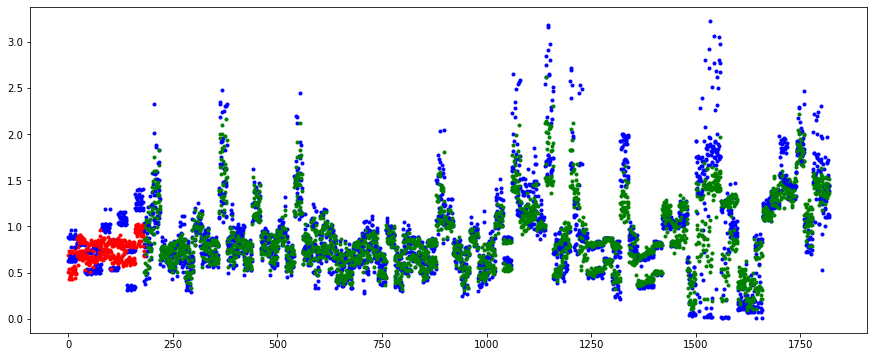

cross validation :  1


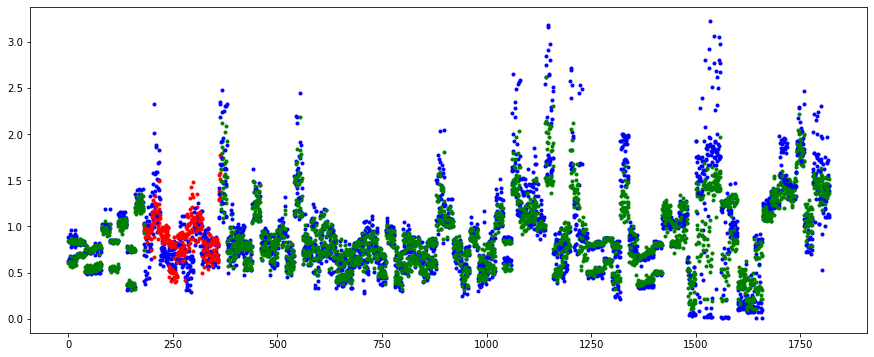

cross validation :  2


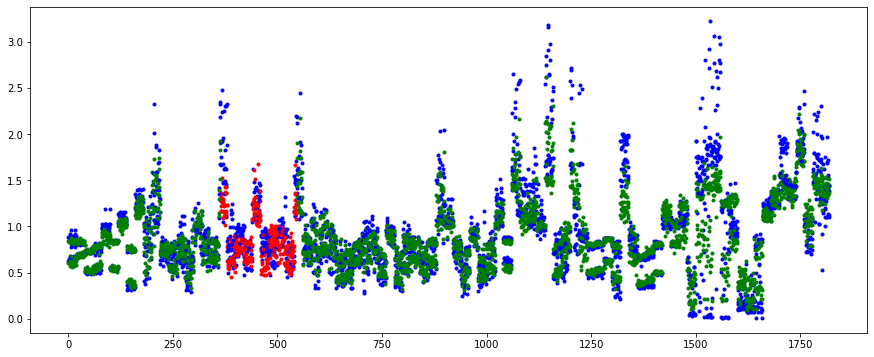

cross validation :  3


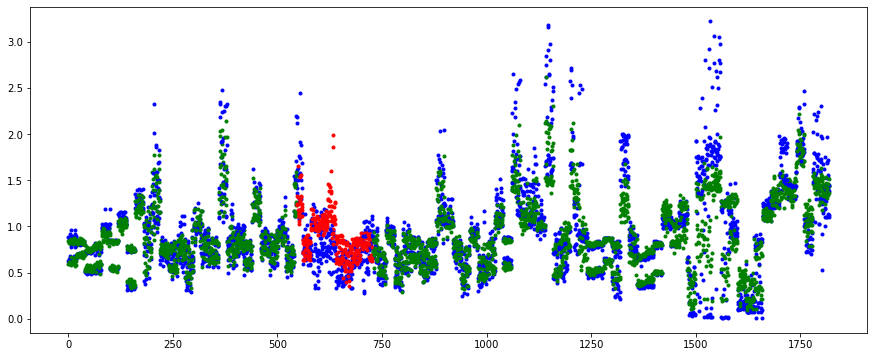

cross validation :  4


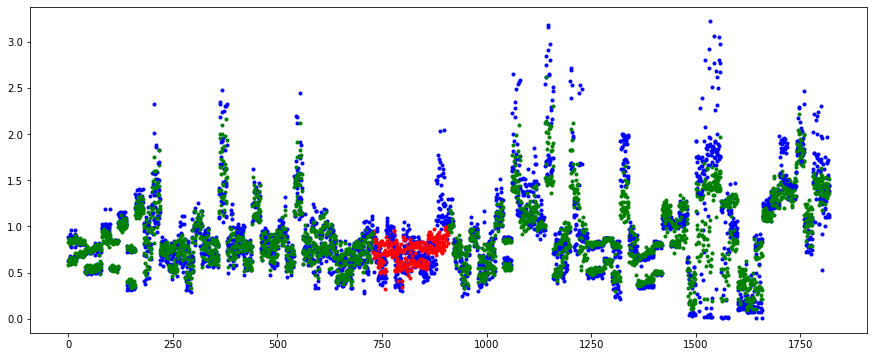

cross validation :  5


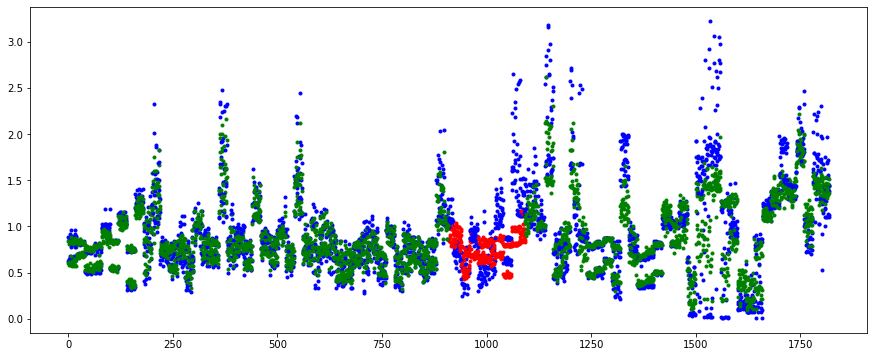

cross validation :  6


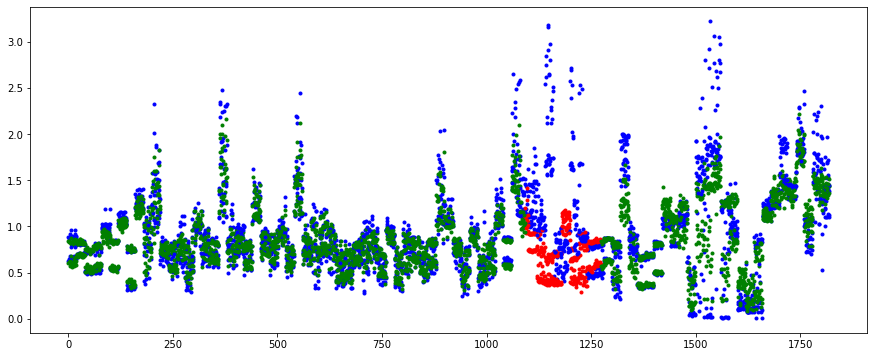

cross validation :  7


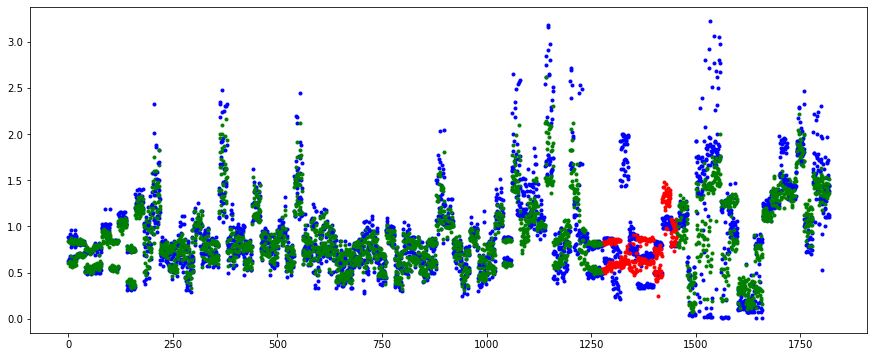

cross validation :  8


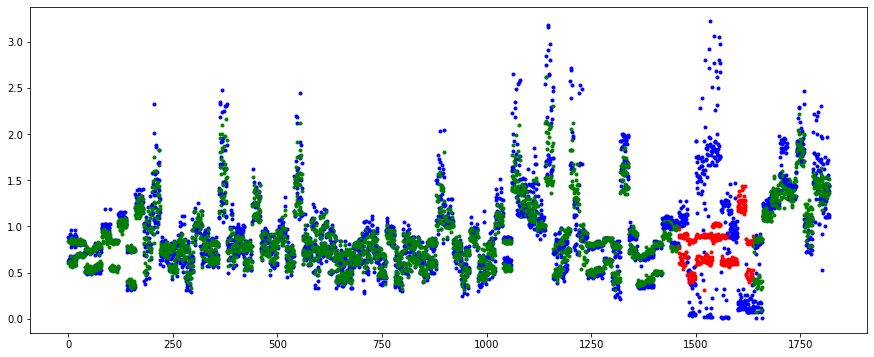

cross validation :  9


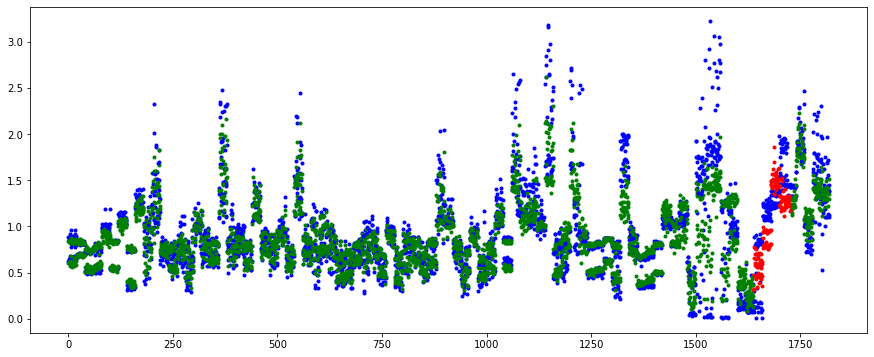

cross validation :  10


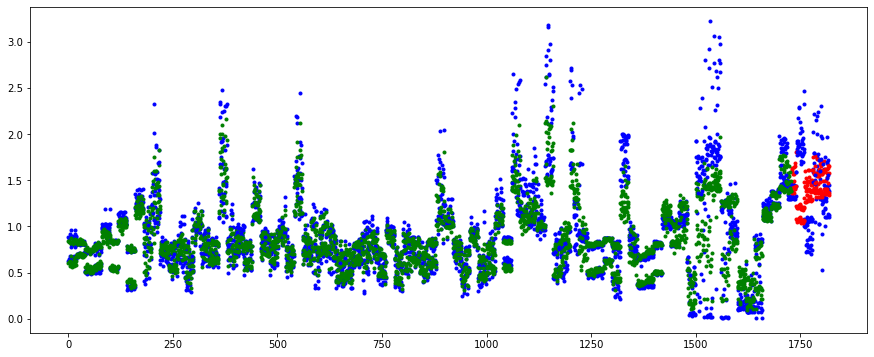

**RESULTS of REGRESSION CROSS-VALIDATION: Part of STP parameters ($y_{data}$) VARIABILITY EXPLAINED by the model:**

TESTING:  Median of $R^{2} = 1 - \frac{<(y_{predicted} - y_{data})^{2}>}{var(y_{data})}$ by all cross-validation iterations : 0.47973858075182346

TESTING:  Mean of $R^{2} = 1 - \frac{median((y_{predicted} - y_{data})^{2})}{median((y_{data}-<y_{data}>)^{2})}$ by all cross-validation iterations :  0.6150573072619309

TESTING:  Mean of $R^{2} = 1 - \frac{<(y_{predicted} - y_{data})^{2}>}{var(y_{data})}$ by all cross-validation iterations, : 0.04421228135430666

TRAINING: Mean of $R^{2} = 1 - \frac{<(y_{trained} - y_{data})^{2}>}{var(y_{data})}$ by all cross-validation iterations : 0.832661134081238

TESTING:  $R^{2} = 1 - \frac{<(y_{predicted} - y_{data})^{2}>}{var(y_{data})}$ for all cross-validation iterations , % :

,0,1,2,3,4,5,6,7,8,9,10
A2_20Hz,81.365471,51.516181,63.193158,51.937202,85.810407,44.431535,-77.166631,-0.698825,-242.554273,19.771678,-41.196151
A5_20Hz,75.367705,70.255311,73.134210,65.479493,67.189622,17.892502,-217.211390,21.891447,-158.669367,61.743395,-16.215661


TRAINING: $R^{2} = 1 - \frac{<(y_{trained} - y_{data})^{2}>}{var(y_{data})}$ for all cross-validation iterations, % :

,0,1,2,3,4,5,6,7,8,9,10
A2_20Hz,84.71995,85.169099,84.962662,84.844719,84.639730,84.916330,86.651173,86.835256,91.644104,86.897140,87.432849
A5_20Hz,78.10608,78.157331,78.172421,78.198428,78.101294,79.017702,83.538647,79.972428,89.838365,79.607166,80.431622


Elapsed time 185.55524587631226s

**DONE.**

In [21]:
# reload genes2stp module
import importlib
importlib.reload(g2p)

# select cross-validation approach : 
# it is defined by a part of data selected for testing as well as way of its selection: random vs sequential and selected level of spt classification tree 
do_cv_type = '10-fold' #'10-fold clusters random' #'10-fold' # '10-fold subclasses' # '10-fold clusters'
### ACHTUNG!!!!!!!!!! CHECK 'part_cv_test_sample' PARAMETER MEANING : if it is a minimal part of samples per testing cv samples? - if it is 1 - 1 spt cluster level will be removed?
if do_cv_type == '10-fold':
    # dictionary of cross validation parameters 
    cv_dict = {'kind':'n_fold', 'n_iterations':10 } # n-fold cross validation
    
if do_cv_type == '10-fold subclasses':
    cv_dict = {'kind':'n_seq_spt_types', 'part_cv_test_sample':0.1 ,   'n_iterations':10, 'cv_levels':['subclass_pre', 'subclass_post'] } # sequential subclasses cv

if do_cv_type == '10-fold subclasses random':
    cv_dict = {'kind':'n_random_spt_types', 'part_cv_test_sample':0.1 ,'n_iterations':10, 'cv_levels':['subclass_pre', 'subclass_post'] } # sequential subclasses cv 

if do_cv_type == '10-fold clusters random':
    cv_dict = {'kind':'n_random_spt_types', 'part_cv_test_sample':0.1 ,'n_iterations':10, 'cv_levels':['vse__pre', 'vse__post'] } # sequential subclasses cv     
    
if do_cv_type == '10-fold clusters sequential':
    cv_dict = {'kind':'n_seq_spt_types', 'part_cv_test_sample':0.1 ,   'n_iterations':10, 'cv_levels':['vse__pre', 'vse__post'] } # sequential subclasses cv     
        
#cv_dict = {'kind':'n_random_spt_types', 'part_cv_test_sample':0.1 ,'n_iterations':10, 'cv_levels':['subclass_pre', 'subclass_post'] } # sequential subclasses cv
#cv_dict = {'kind':'n_seq_spt_types', 'part_cv_test_sample':0.1 ,'n_iterations':10, 'cv_levels':['subclass_pre', 'subclass_post'] } # sequential subclasses cv
#cv_dict = {'kind':'n_seq_spt_types', 'part_cv_test_sample':0.1 ,'n_iterations':10, 'cv_levels':['subclass_pre', 'subclass_post'] } # sequential subclasses cv

# dictionary with columns names
columns={'x_data':ge_columns_train, 'y_data':stp_n, 'clusters':cla_n2, 'annotations':annot_columns_train}  

# RUN models training and testing
display(Markdown('**TRAINING and TESTING STARTED ...**'))
Y_pred, Y_pred0, Samples_test,  R3, OUT = \
g2p.train_and_test_classification_models(X2, y2_cl, X2_cl, X2_an, H_Models, y2_reg=np.copy(y2),columns=columns,
                                         preprocessing_data=preprocessing_, cv_dict=cv_dict, cuda0=cuda0, verbosity = verbosity)
display(Markdown('**DONE.**'))


**RESULTS REGRESSION:**

***draw STP prediction vs. data and relative errors of predictions for all synaptic pair types***

R2_ctx 0.18769260653364916
median, var R2_ctx 0.46557884632787383
median, mad R2_ctx 0.27964339094284585
R2_ctx 0.0760760729581128
median, var R2_ctx 0.7492618416115999
median, mad R2_ctx 0.5646406080284321


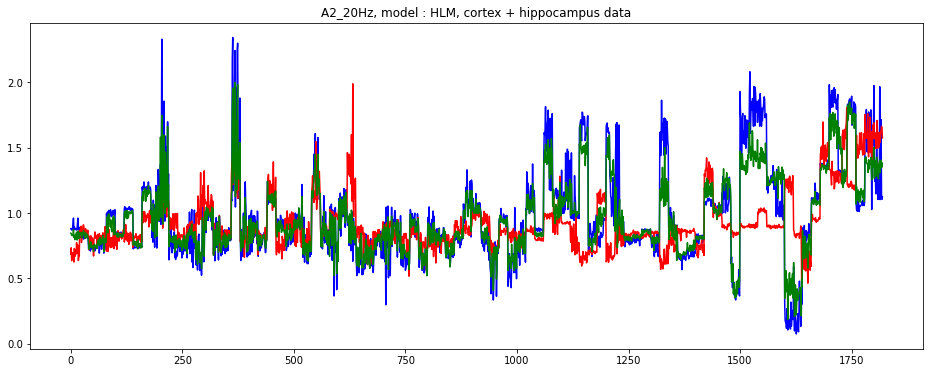

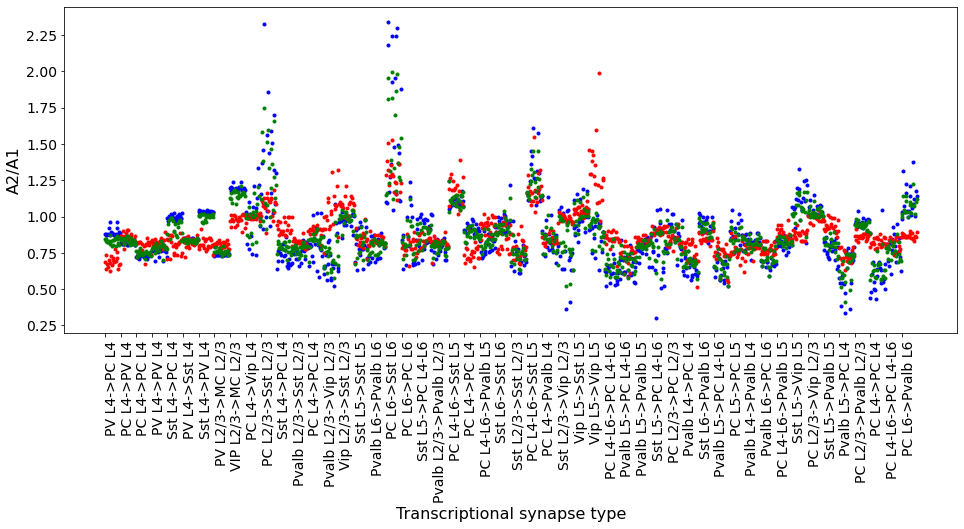

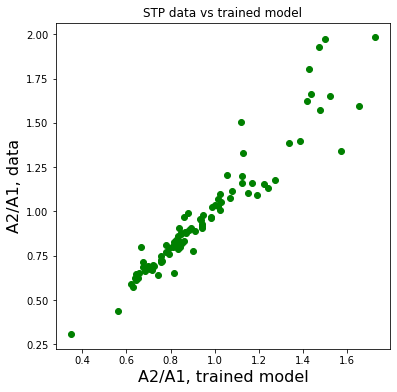

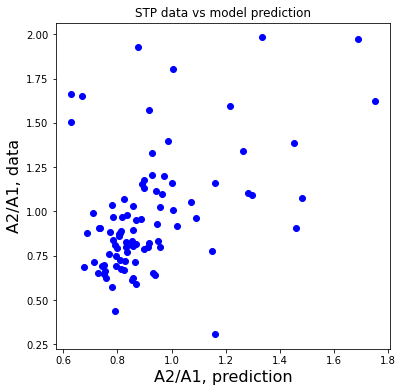

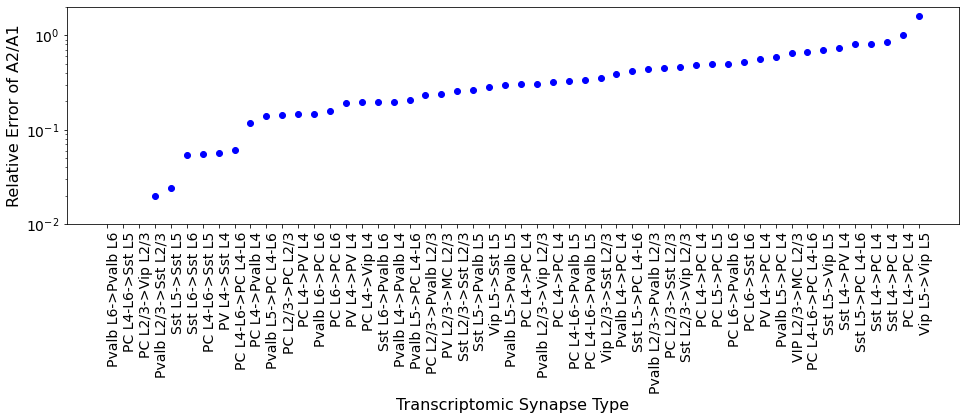

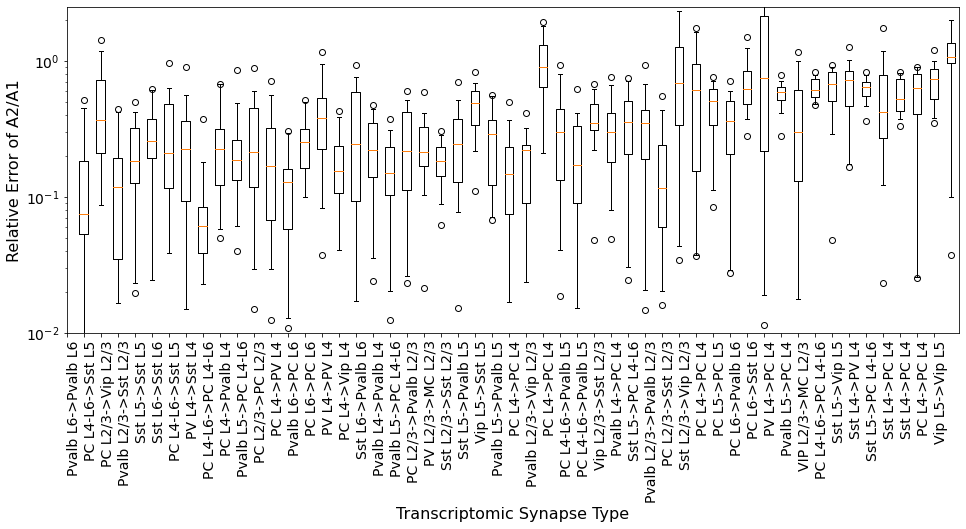

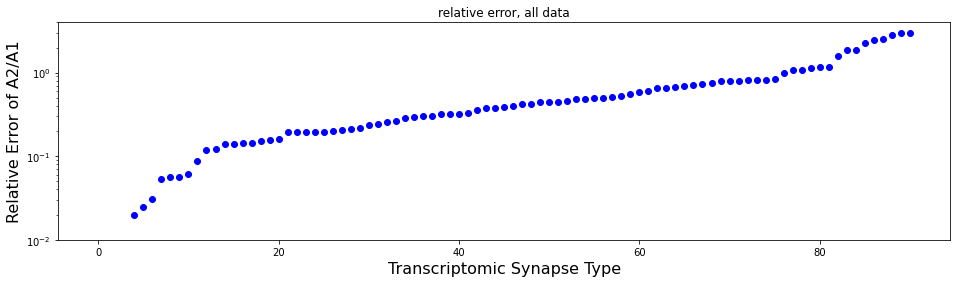

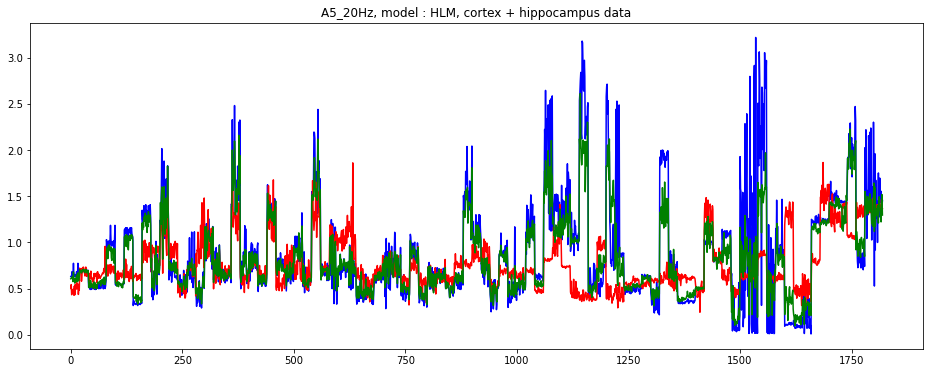

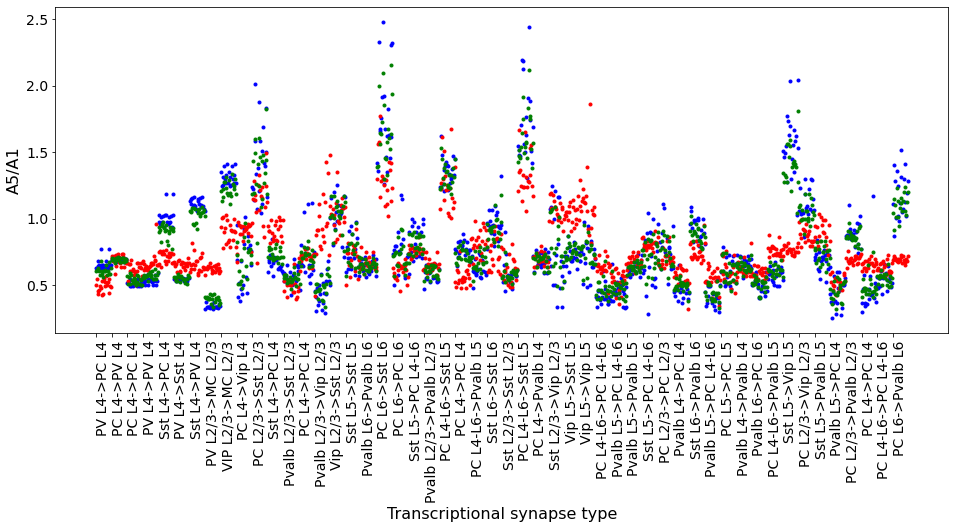

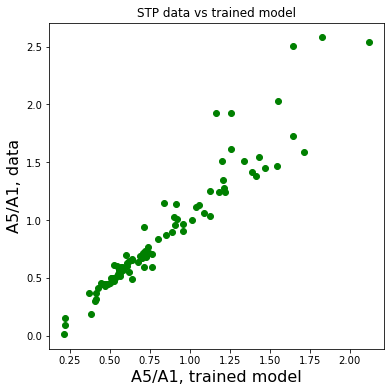

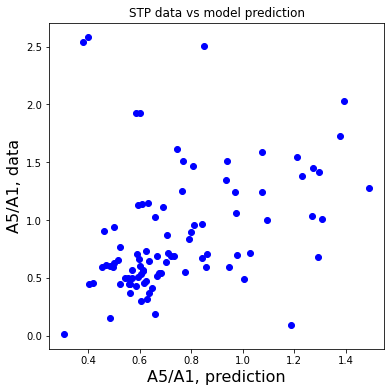

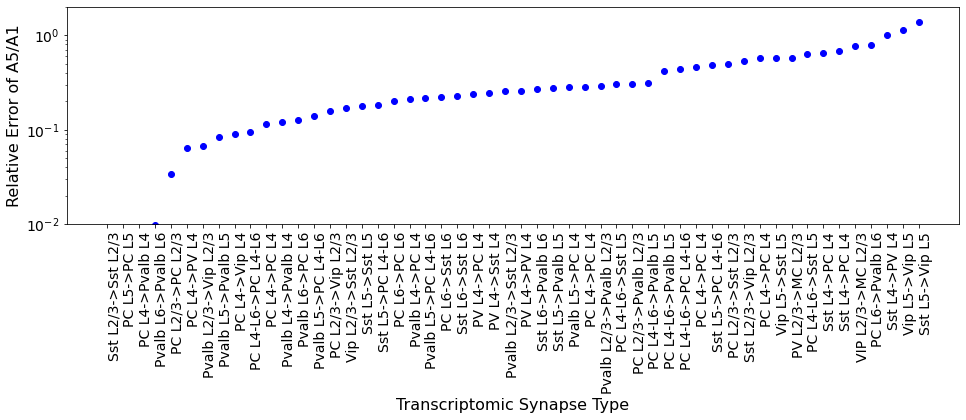

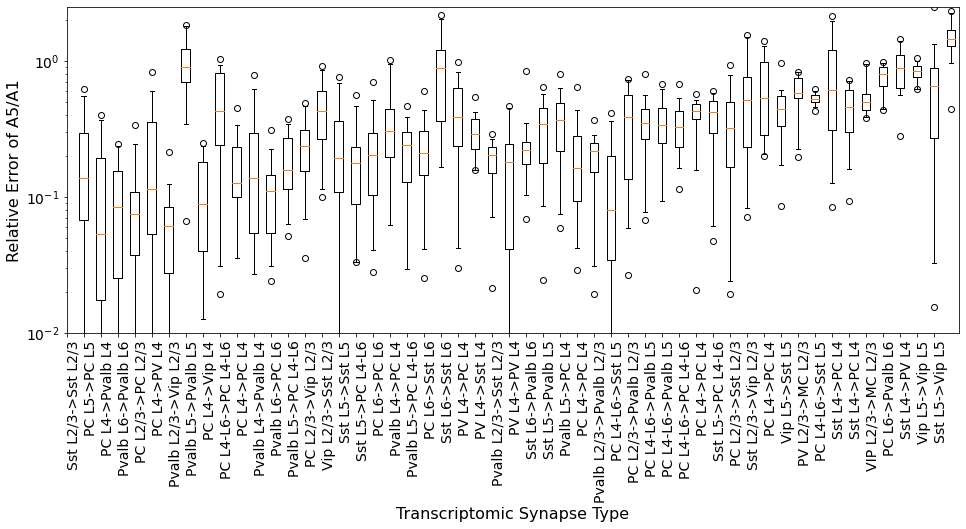

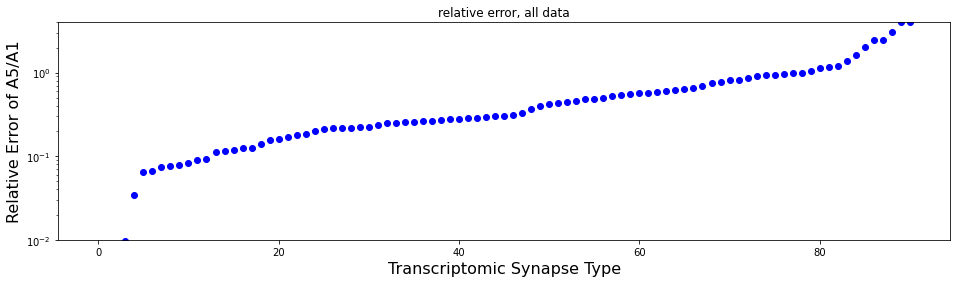

In [22]:
y2 = R3[0][0]['y_reg']
Samples_ = np.arange(y2.shape[0])

y_pred = 0*R3[0][0]['y_reg'].copy()
y_pred0 = 0*R3[0][0]['y_reg'].copy()
stp_num = []
for icv in range(len(R3[0])):
    y_pred[Samples_test[0][icv],:] = R3[0][icv]['y_pred_reg'].copy()
    Samples_train = np.delete(Samples_,Samples_test[0][icv])
    y_pred0[Samples_train,:] = R3[0][icv]['y_pred0_reg'].copy()

for iy in range(y2.shape[1]):    
    stp_num = stp_num + [int(stp_n[iy][1])] 

for iy in range(y2.shape[1]):
    f, ax =plt.subplots(figsize=(16, 6))
    ##f, ax = plt.figure()
    ##ax = f.add_axes()

    #plt.title(stp_columns[iy]+", model : "+mdn+", cv : "+str(icv))
    #plt.title(stp_columns_train[iy]+", model : "+mdn)
    plt.title(stp_n[iy]+", model : "+mdn+", cortex + hippocampus data")

    #ax.set_title(stp_columns[i]+' '+', subclass out of bag: '+str(i0))
    #yy1.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)
    
    #plt.plot(y2[:,iy].ravel(),'ob')
    #plt.plot(y_pred[:,iy].ravel(),'xr')
    #plt.plot(y_pred0[:,iy].ravel(),'xg')

    plt.plot(y2[:,iy].ravel(),'b')
    plt.plot(y_pred[:,iy].ravel(),'r')
    plt.plot(y_pred0[:,iy].ravel(),'g')

    #plt.xticks(np.arange(len(yy1.index)), yy1.index, rotation=90)

    f, ax =plt.subplots(figsize=(16, 6))
    #d3 = '/content/drive/My Drive/Colab Notebooks/'
    d3 = ''
    nms = pd.read_excel(d3+'names_of_synapses_ctx.xlsx')
    n_ctx = nms.shape[0]
    #Dn2 = int(N_bootstraps/Dn)
    n_ctx2=n_ctx*Dn2
    plt.plot(y2[:n_ctx2,iy].ravel(),'.b')
    plt.plot(y_pred[:n_ctx2,iy].ravel(),'.r')
    plt.plot(y_pred0[:n_ctx2,iy].ravel(),'.g')
    xD = np.arange(n_ctx)*Dn2
    ax.set_xticks(xD)
    ax.set_xticklabels(nms.loc[:,0].values)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")
    plt.ylabel('A'+str(stp_num[iy])+'/A1',fontsize=16)
    plt.xlabel('Transcriptional synapse type',fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    f, ax =plt.subplots(figsize=(6, 6))
    plt.plot(y_pred0[0::Dn2,iy].ravel(),y2[0::Dn2,iy].ravel(),'og')
    plt.ylabel('A'+str(stp_num[iy])+'/A1, data',fontsize=16)
    plt.xlabel('A'+str(stp_num[iy])+'/A1, trained model',fontsize=16)
    plt.title("STP data vs trained model")
    
    f, ax =plt.subplots(figsize=(6, 6))
    plt.plot(y_pred[0::Dn2,iy].ravel(),y2[0::Dn2,iy].ravel(),'ob')
    plt.ylabel('A'+str(stp_num[iy])+'/A1, data',fontsize=16)
    plt.xlabel('A'+str(stp_num[iy])+'/A1, prediction',fontsize=16)
    plt.title("STP data vs model prediction")

#.  relative error
    f, ax =plt.subplots(figsize=(16, 4))
    #d3 = '/content/drive/My Drive/Colab Notebooks/'
    d3=''
    nms = pd.read_excel(d3+'names_of_synapses_ctx.xlsx')
    mad2 = np.mean((y2[:,iy]-np.mean(y2[:,iy]))**2)
    mad3 = np.median((y2[:,iy]-np.mean(y2[:,iy]))**2)
    mad4 = np.median((y2[:,iy]-np.median(y2[:,iy]))**2)
    dyy = y_pred[0::Dn2,iy].ravel()-y2[0::Dn2,iy].ravel()
    print('R2_ctx',1 - np.mean(dyy**2)/ mad2)
    print('median, var R2_ctx',1 - np.median(dyy**2)/mad3 )
    print('median, mad R2_ctx',1 - np.median(dyy**2)/mad4 )
    dyy=np.abs(dyy)/np.sqrt(mad2)

    n_ctx = nms.shape[0]
    dyy = dyy[:n_ctx] #cortex
    isrt=np.argsort(dyy,axis=0)
    plt.plot(dyy[isrt],'ob')

    xD = np.arange(n_ctx)
    #yD = np.arange(0,nms4.shape[0])
    ax.set_xticks(xD)
    #ax.set_yticks(yD)
    # ... and label them with the respective list entries
    #ax.set_yticklabels(nms4)
    ax.set_xticklabels(nms.loc[isrt,0].values)
        #ax.set_yticklabels(vse_pre2[yD])
    #ax.tick_params(axis='x', colors='none')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")
    #axes.set_ylim(-1, nmm+1)
    #ax.grid( b=False)
    
    plt.ylim([0.01,2])
    plt.yscale('log')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Relative Error of A'+str(stp_num[iy])+'/A1',fontsize=16)
    plt.xlabel('Transcriptomic Synapse Type',fontsize=16)

#.  box plot
    f, ax =plt.subplots(figsize=(16, 6))
    y_pred_s = y_pred[:,iy].ravel().reshape([-1,Dn2]) 
    y_pred0_s = y_pred0[:,iy].ravel().reshape([-1,Dn2])  
    y2_s = y2[:,iy].ravel().reshape([-1,Dn2])  
    dyy_s = np.abs(y_pred_s - y2_s)/np.sqrt(mad2)
    dyy0_s = np.abs(y_pred0_s - y2_s)/np.sqrt(mad2)

    istr = np.argsort(np.median(dyy_s.transpose()))
    labels=nms.loc[isrt,0].values#np.tile(nms.loc[isrt,0].values.reshape([-1,1]), [1,Dn2])
    data_s=dyy_s[isrt,:].transpose()
    plt.boxplot(data_s, whis=[5,95]) #,color='g')
    #plt.boxplot(dyy0_s[isrt]) #,color='b')
    xD = np.arange(n_ctx) #*Dn2
    ax.set_xticks(xD)
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")
    #plt.ylabel('A5/A1',fontsize=16)
    #plt.xlabel('Transcriptional synapse type',fontsize=16)

    plt.ylim([0.01,2.5])
    plt.yscale('log')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Relative Error of A'+str(stp_num[iy])+'/A1',fontsize=16)
    plt.xlabel('Transcriptomic Synapse Type',fontsize=16)


#    # relative error all data
    f, ax =plt.subplots(figsize=(16, 4))
    mad2 = np.mean((y2[:,iy]-np.mean(y2[:,iy]))**2)
    dyy=np.abs(y_pred[0::Dn2,iy].ravel()-y2[0::Dn2,iy].ravel())/np.sqrt(mad2)
    isrt=np.argsort(dyy,axis=0)
    plt.plot(dyy[isrt],'ob')
    plt.ylim([0.01,4])
    plt.yscale('log')
    plt.ylabel('Relative Error of A'+str(stp_num[iy])+'/A1',fontsize=16)
    plt.xlabel('Transcriptomic Synapse Type',fontsize=16)
    plt.title("relative error, all data")

**RESULTS REGRESSION :** 

**Draw statistics of most influencing predictive transcriptomic features - 50 best genes (by w^2) for major synaptic pairs clusters**

cross validation index :10

$w^{2}$ fraction explained by 50 of 1717 genetic features for major synaptic pairs clusters

Cluster #22<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 26.514288668723207%  <br> Number of synaptic pairs assigned to the cluster: 180<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['ex_ctx__pre'],
 'subclass_post': ['ex_ctx__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['ex_ctx__post'],
 'vse__pre': ['ev_l23', 'ev_l4', 'ev_l56'],
 'vse__post': ['ev_l23', 'ev_l4', 'ev_l56']}

Cluster #12<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 29.52820771501464%  <br> Number of synaptic pairs assigned to the cluster: 160<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['pvalb__pre'],
 'subclass_post': ['pvalb__post'],
 'subclass_pre_c': ['pvalb__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Pvalb_h', 'Pvalb'],
 'vse__post': ['Pvalb_h', 'Pvalb']}

Cluster #11<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 28.474644954211158%  <br> Number of synaptic pairs assigned to the cluster: 120<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['pvalb__pre'],
 'subclass_post': ['ex_ctx__post'],
 'subclass_pre_c': ['pvalb__pre'],
 'subclass_post_b': ['ex_ctx__post'],
 'vse__pre': ['Pvalb'],
 'vse__post': ['ev_l4', 'ev_l56']}

Cluster #23<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 35.34901649619129%  <br> Number of synaptic pairs assigned to the cluster: 120<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_ctx__pre'],
 'subclass_post': ['pvalb__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['ev_l23', 'ev_l4', 'ev_l56'],
 'vse__post': ['Pvalb']}

Cluster #14<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 46.34859851462356%  <br> Number of synaptic pairs assigned to the cluster: 100<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_ec__pre'],
 'subclass_post': ['cge__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['e_e'],
 'vse__post': ['Cck_h', 'Lamp5_h']}

Cluster #0<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 53.63539956648129%  <br> Number of synaptic pairs assigned to the cluster: 100<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['cge__pre'],
 'subclass_post': ['ex_hipp__post'],
 'subclass_pre_c': ['cge__pre'],
 'subclass_post_b': ['ex_hipp__post'],
 'vse__pre': ['Cck_h', 'Lamp5_h'],
 'vse__post': ['e_ca', 'e_dg']}

Cluster #19<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 27.067614753243802%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['sst__pre'],
 'subclass_post': ['pvalb__post'],
 'subclass_pre_c': ['sst__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Sst', 'Sst_h'],
 'vse__post': ['Pvalb_h', 'Pvalb']}

Cluster #2<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 28.265240109908458%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['cge__pre'],
 'subclass_post': ['sst__post'],
 'subclass_pre_c': ['cge__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Vip'],
 'vse__post': ['Sst', 'Sst_h']}

Cluster #21<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 30.36245843161115%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_ctx__pre'],
 'subclass_post': ['sst__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['ev_l23', 'ev_l4', 'ev_l56'],
 'vse__post': ['Sst']}

Cluster #1<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 61.22399492102344%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['cge__pre'],
 'subclass_post': ['cge__post'],
 'subclass_pre_c': ['cge__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Cck_h', 'Lamp5_h', 'Vip'],
 'vse__post': ['Cck_h', 'Lamp5_h', 'Vip']}

Cluster #5<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 56.21670311567228%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_hipp__pre'],
 'subclass_post': ['cge__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['e_ca', 'e_dg'],
 'vse__post': ['Cck_h', 'Lamp5_h']}

Cluster #17<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 27.4349174456031%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['sst__pre'],
 'subclass_post': ['sst__post'],
 'subclass_pre_c': ['sst__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Sst', 'Sst_h'],
 'vse__post': ['Sst', 'Sst_h']}

Cluster #18<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 38.42648553418383%  <br> Number of synaptic pairs assigned to the cluster: 80<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['sst__pre'],
 'subclass_post': ['ex_ctx__post'],
 'subclass_pre_c': ['sst__pre'],
 'subclass_post_b': ['ex_ctx__post'],
 'vse__pre': ['Sst'],
 'vse__post': ['ev_l4']}

Cluster #10<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 45.42086435519515%  <br> Number of synaptic pairs assigned to the cluster: 60<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['pvalb__pre'],
 'subclass_post': ['sst__post'],
 'subclass_pre_c': ['pvalb__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Pvalb'],
 'vse__post': ['Sst']}

Cluster #7<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 29.222516489232824%  <br> Number of synaptic pairs assigned to the cluster: 60<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_hipp__pre'],
 'subclass_post': ['pvalb__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['e_ca', 'e_dg'],
 'vse__post': ['Pvalb_h']}

Cluster #6<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 32.4138292642506%  <br> Number of synaptic pairs assigned to the cluster: 40<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_hipp__pre'],
 'subclass_post': ['sst__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['e_ca'],
 'vse__post': ['Sst_h']}

Cluster #8<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 29.041462563128544%  <br> Number of synaptic pairs assigned to the cluster: 40<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['pvalb__pre'],
 'subclass_post': ['ex_hipp__post'],
 'subclass_pre_c': ['pvalb__pre'],
 'subclass_post_b': ['ex_hipp__post'],
 'vse__pre': ['Pvalb_h'],
 'vse__post': ['e_dg']}

Cluster #20<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 33.15571554980928%  <br> Number of synaptic pairs assigned to the cluster: 40<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['ex_ctx__pre'],
 'subclass_post': ['cge__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['ev_l23', 'ev_l4'],
 'vse__post': ['Vip']}

Cluster #16<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 41.40328019238214%  <br> Number of synaptic pairs assigned to the cluster: 40<br> Synaptic pairs classification tree:

{'class_pre': ['inh__pre'],
 'class_post': ['inh__post'],
 'subclass_pre': ['sst__pre'],
 'subclass_post': ['cge__post'],
 'subclass_pre_c': ['sst__pre'],
 'subclass_post_b': ['inh__post'],
 'vse__pre': ['Sst'],
 'vse__post': ['Vip']}

Cluster #4<br> $\sum{w_{0:50}^{2}}/\sum{w^{2}}$*100% = 32.167535523254344%  <br> Number of synaptic pairs assigned to the cluster: 29<br> Synaptic pairs classification tree:

{'class_pre': ['ex__pre'],
 'class_post': ['ex__post'],
 'subclass_pre': ['ex_hipp__pre'],
 'subclass_post': ['ex_hipp__post'],
 'subclass_pre_c': ['ex__pre'],
 'subclass_post_b': ['ex_hipp__post'],
 'vse__pre': ['e_dg'],
 'vse__post': ['e_ca']}

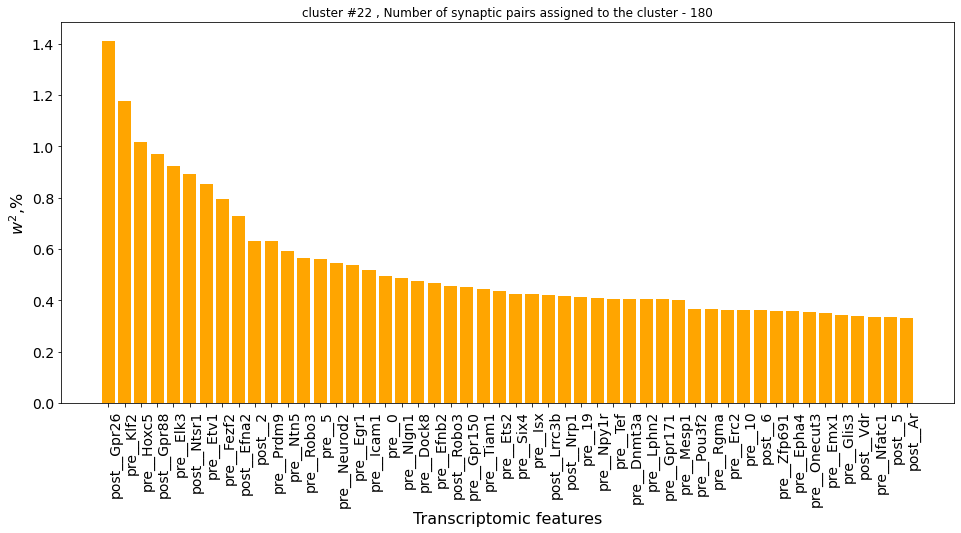

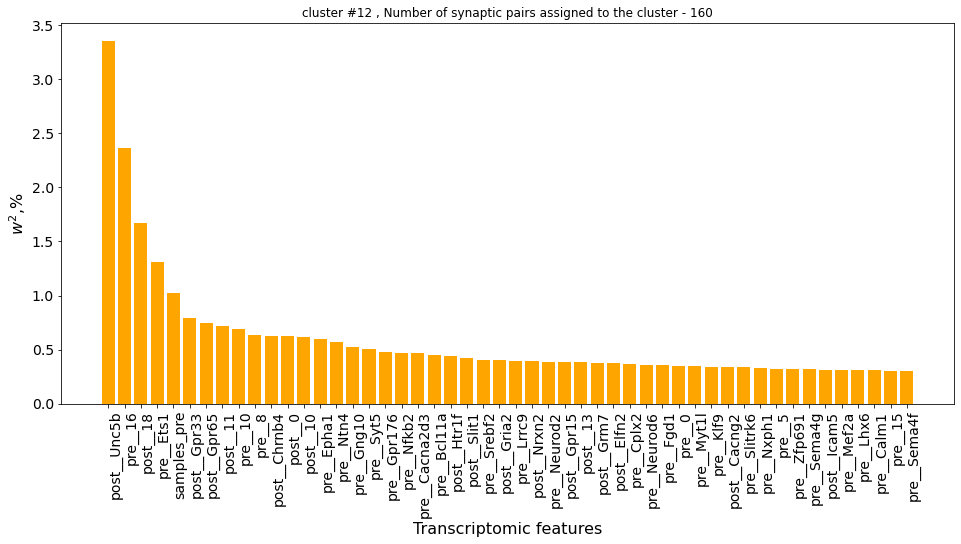

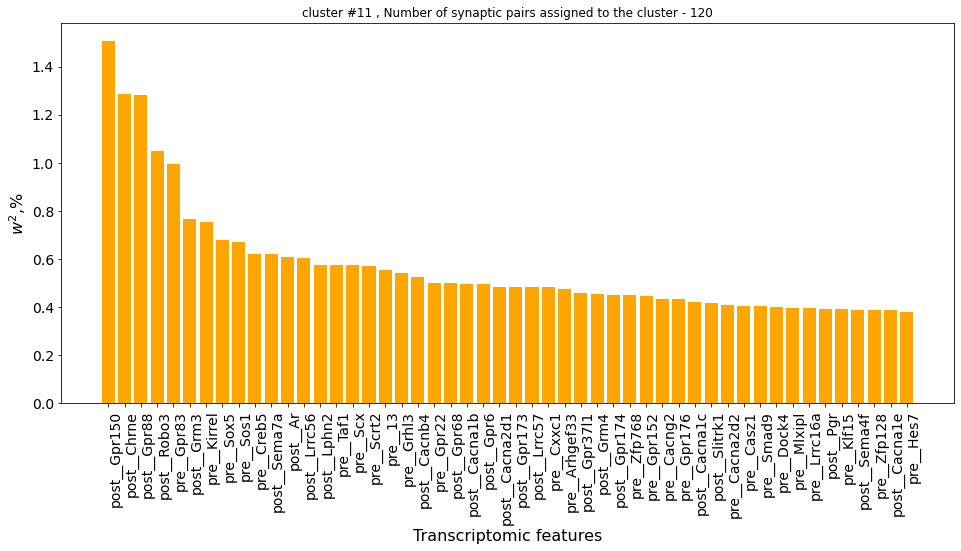

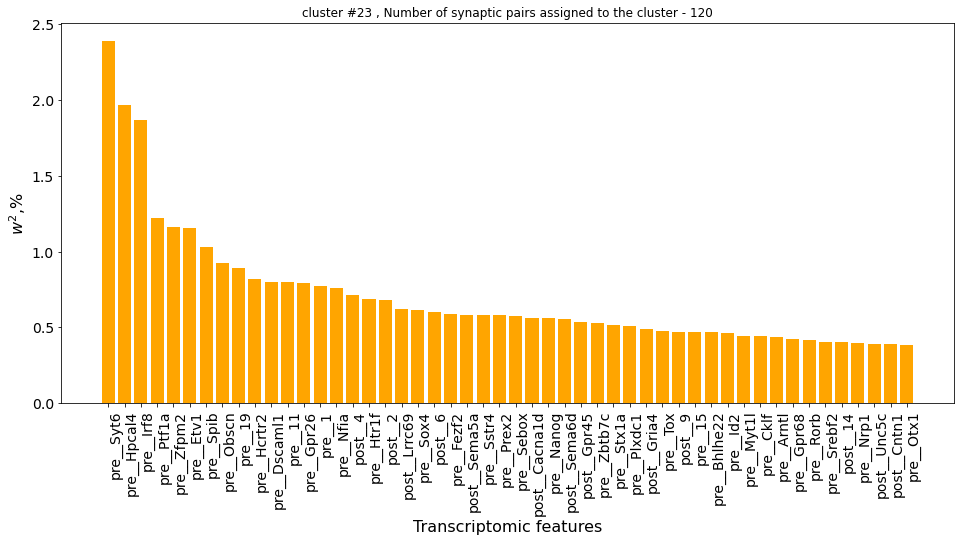

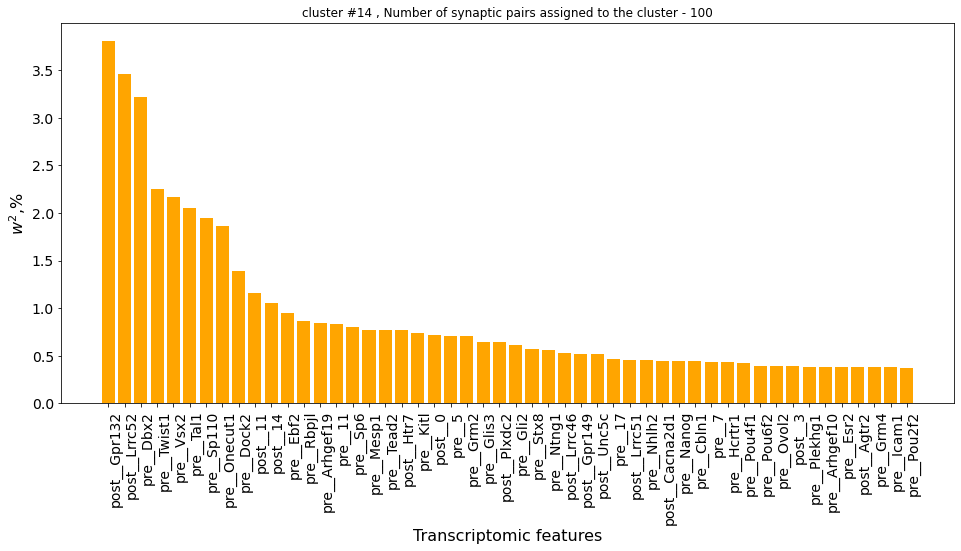

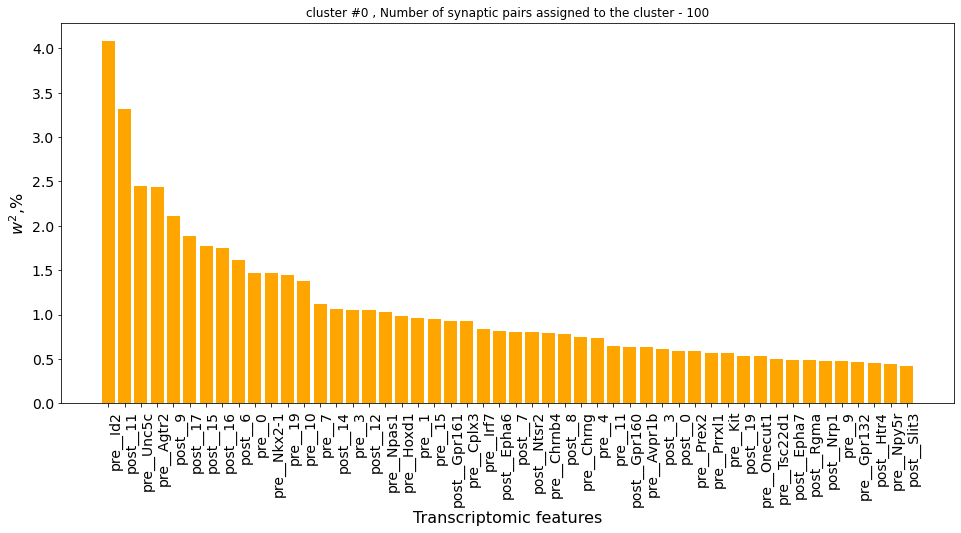

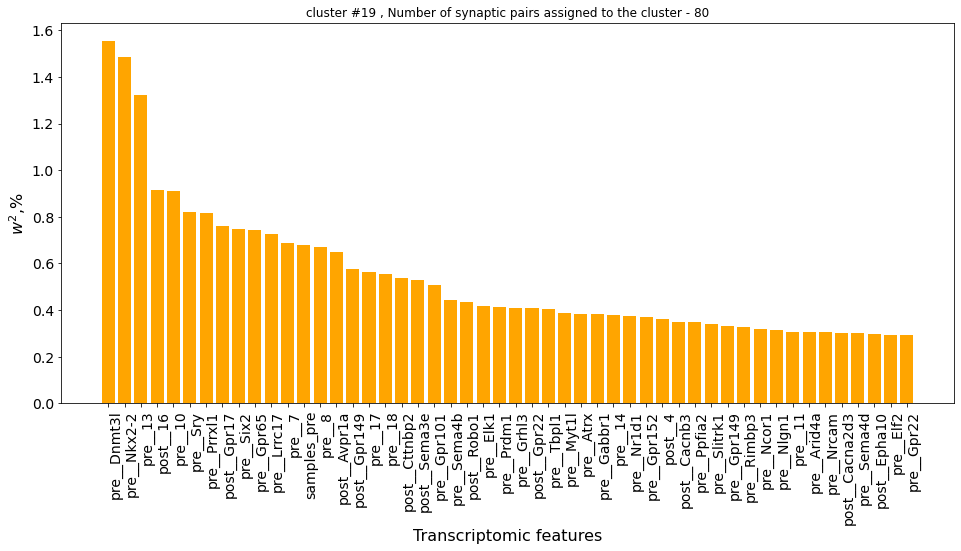

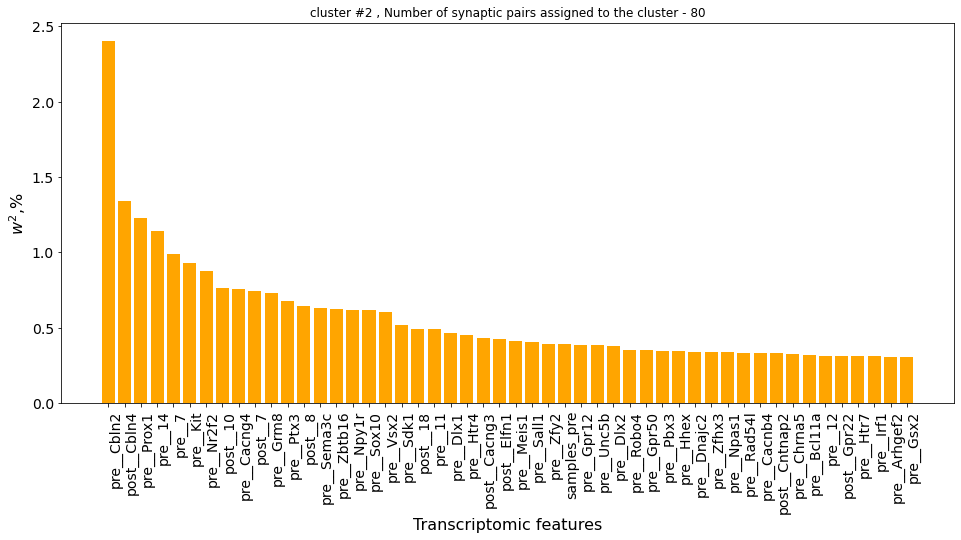

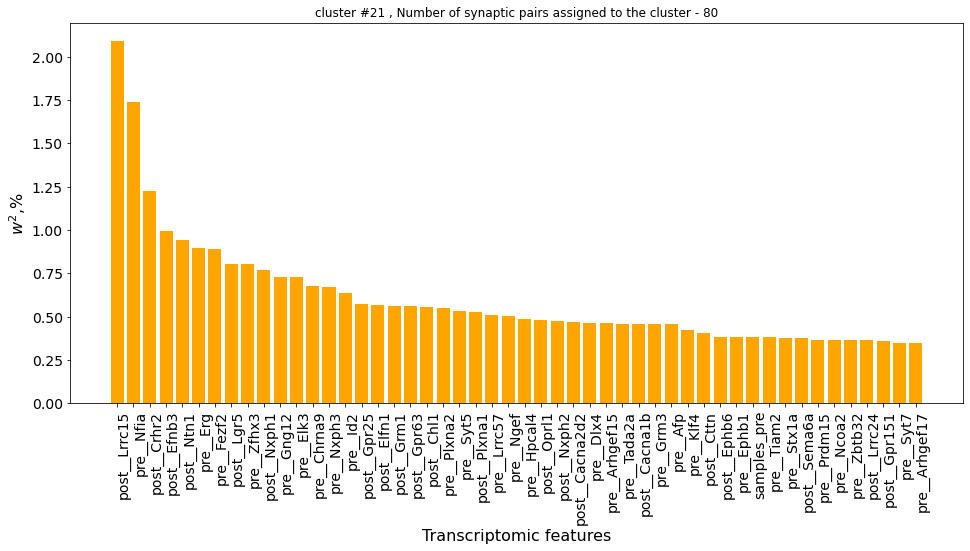

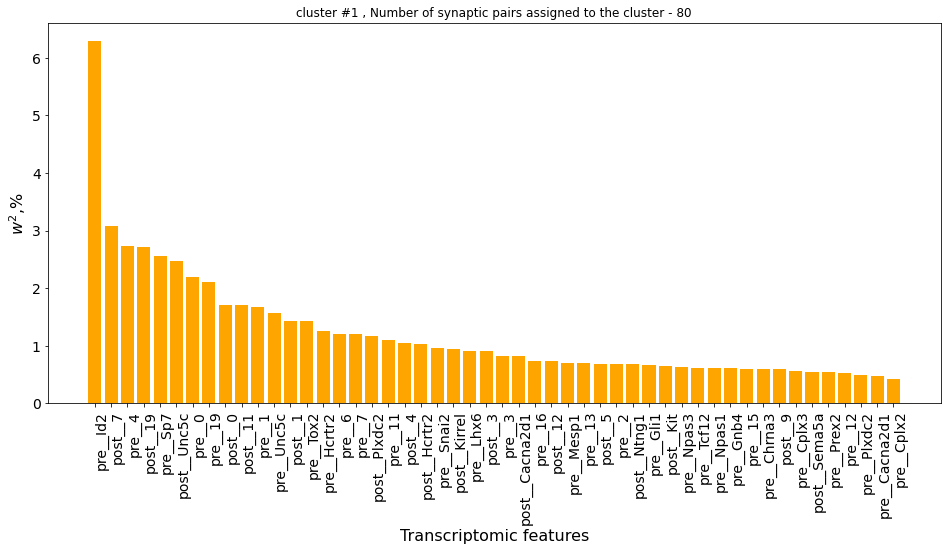

In [26]:
# hierarchy of classification levels that will be displayed for each synaptic pair types cluster
selected_spt_hierarhy = ['class_pre','class_post','subclass_pre','subclass_post','subclass_pre_c','subclass_post_b','vse__pre','vse__post']

# select index of cross validation iteration to display
icv=len(R3[0])-1
display(Markdown('cross validation index :'+str(icv)))
y2 = R3[0][0]['y_reg']
Samples_ = np.arange(y2.shape[0])
Samples_train = np.delete(Samples_,Samples_test[0][icv])


# collect HLM parameters for icv cross validation itaration
Wp2=OUT[0]["Wp2"]
Lambdas2=OUT[0]["Lambdas2"].cpu().numpy()
zo_optimal=OUT[0]['zo_optimal'].cpu().numpy()
#print('Lambdas shape : ',Lambdas2.shape)
#print('Wp2 shape : ',len(Wp2))
df_zo = pd.DataFrame(zo_optimal)
df_zo = df_zo.value_counts()
#df_zo

# list of main spt clusters with numbers of sp assigned to them
i_zo =  np.array([s[0] for s in df_zo.iloc[0:20].index.values.tolist()])
df_l = pd.DataFrame(Lambdas2)


# sum w**2 by stp parameters for each transcriptomic feature in each spt cluster
Wp3=[]
for wp in Wp2:
    if wp==None:
        wp=np.zeros([Wp2[0].shape[0],]) 
    else: 
        wp=wp.cpu().numpy() 
        wp=np.sum(wp**2,axis=1).reshape([-1,]) # ACHTUNG!!!! each stp dimension sould be described separately
    Wp3 = Wp3 + [wp]
Wp3 = pd.DataFrame(Wp3).T
Wp3.head()


# List of high score genes for main spt clusters
print('    ')
display(Markdown('$w^{2}$ fraction explained by 50 of 1717 genetic features for major synaptic pairs clusters :'))
for i in range(len(i_zo)):
    wp = Wp3.loc[:,i_zo[i]].sort_values(ascending=False)
    print('    ')
    #display(Markdown('cluster #'+str(i_zo[i])+'<br> $\\sum{w_{0:50}^{2}}/\\sum{w^{2}}$*100% = '+str(wp.iloc[0:50].sum()/wp.sum()*100)+'%'))
    # print classification tree for each cluster
    i_cl = zo_optimal==i_zo[i]
    i_cl = Samples_train[i_cl]
    #all_h=[]
    d1 = {}
    for l in range(len(selected_spt_hierarhy)):
        i_x_cl =  np.array(classes_columns_train) == selected_spt_hierarhy[l]
        all_h_l = list(set(X2_cl[i_cl,:][:,i_x_cl].reshape([-1,])))
        #d1 = dict(d1, **{selected_spt_hierarhy[l]:all_h_l});
        d1.update({selected_spt_hierarhy[l]:all_h_l})
        #all_h = all_h + [all_h_l]
    display(Markdown('Cluster #'+str(i_zo[i])+'<br> $\\sum{w_{0:50}^{2}}/\\sum{w^{2}}$*100% = '+str(wp.iloc[0:50].sum()/wp.sum()*100)+
                     '%  <br> Number of synaptic pairs assigned to the cluster: '+str(df_zo[i_zo[i]]) + '<br> Synaptic pairs classification tree:'))    
    #display(Markdown('cluster #'+str(i_zo[i])+' , synaptic pairs classification tree: '))
    #fd1 = pd.DataFrame.from_dict(d1)
    display(d1)
    
    
    
    if i<10: # show first 10 major clusters
        # plot first 50 genes w**2
        wp_50 = wp.iloc[:50]
        wp_50 = wp_50/wp.sum()*100
        f, ax =plt.subplots(figsize=(16, 7))
        orangc = np.array([255,94,19])/255
        plt.bar(np.arange(wp_50.shape[0]),wp_50.values,  width=0.8 , color='orange') # first 50 high scored genes

        # Show all ticks and label them with the respective list entries.
        ax.set_xticks(np.arange(wp_50.shape[0]))
        #ax.set_yticks(np.arange(data.shape[0]))
        genes = wp_50.index.values
        genes = np.array(ge_columns_train)[genes]
        ax.set_xticklabels(genes)
        #ax.set_yticklabels(row_labels)
        #print(col_labels)
        plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor") 
        
        #plt.ylim([0.01,2.5])
        #plt.yscale('log')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        #r'$\alpha > \beta$'
        plt.ylabel(r'$w^{2}$,%',fontsize=16)
        plt.xlabel('Transcriptomic features',fontsize=16)     
        plt.title('cluster #'+str(i_zo[i]) + ' , Number of synaptic pairs assigned to the cluster - '+str(df_zo[i_zo[i]]))
        
  

 
    
# print('w**2 explained by 20% of 1717 genes')    
# for i in range(len(i_zo)):
#     wp = Wp3.loc[:,i_zo[i]].sort_values(ascending=False)
#     print('explained w**2 by 20% genes for cluster #',i_zo[i],' sum(w[0:50]**2)/sum(w**2)*100% = ', wp.iloc[0:2*172].sum()/wp.sum()*100)    


**RESULTS CLASSIFICATION:**

***draw probabilities of STP class prediction for all synaptic pair types***

(91, 3)
52


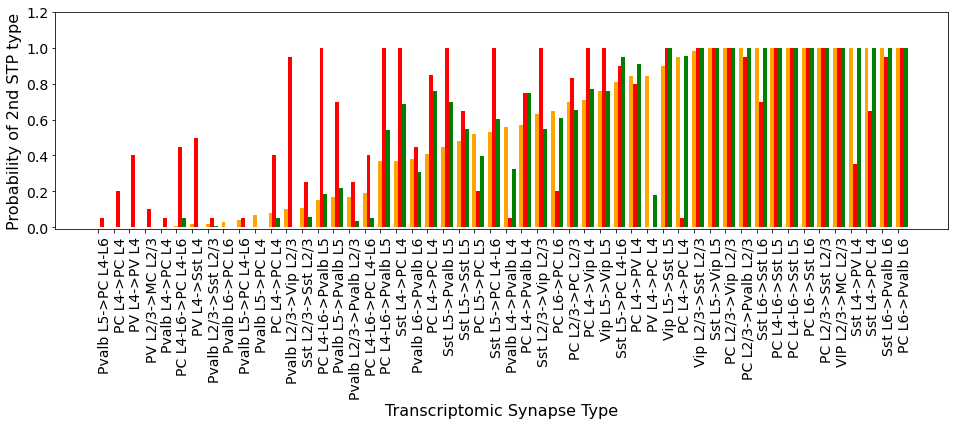

In [27]:
old=False
if old==False:    

    R4 = R3[0]

    # 1 combine p_test, p_train?
    nf=R4[0]['probab_y2'].shape[1]
    ns=R4[0]['probab_y2'].shape[0]
    p_data = R4[0]['probab_y2']
    p_test = np.zeros([ns,nf])
    p_train = np.zeros([ns,nf])
    n_test = np.zeros([ns,nf])
    n_train = np.zeros([ns,nf])

    for s in range(len(R4)):
        s_test = R4[s]['samples_y2test']
        s_train = R4[s]['samples_y2train']
        #p_test[s_test,:]=p_test[s_test,:]+R4[s]['probab_y2test']
        p_test[s_test,:]=R4[s]['probab_y2test']
        p_train[s_train,:]=p_train[s_train,:]+R4[s]['probab_y2train']
        n_test[s_test,:]=n_test[s_test,:]+1
        n_train[s_train,:]=n_train[s_train,:]+1
    #p_test=p_test/n_test  
    p_train=p_train/n_train 

    i_tp = 0
    p_1 = np.concatenate([p_data[:,[i_tp]], p_test[:,[i_tp]], p_train[:,[i_tp]]], axis=1)
    print(p_1.shape)

    # 2 find names for syn_pair_types
    d3 = '/content/drive/My Drive/Colab Notebooks/'
    d3=''
    nms = pd.read_excel(d3+'names_of_synapses_ctx.xlsx')

    # 3 draw probabilities
    f, ax =plt.subplots(figsize=(16, 4))

    n_ctx = nms.shape[0]
    print(n_ctx)
    istr = np.argsort(p_1[:n_ctx,0])
    labels=nms.loc[istr,0].values#np.tile(nms.loc[isrt,0].values.reshape([-1,1]), [1,Dn2])
    #data_s=p_1[istr,:].transpose()

    data_s=p_1[istr,:]
    #plt.boxplot(data_s, whis=[5,95]) #,color='g')
    #orangc = np.array([255,94,19])/255
    #plt.bar(np.arange(len(R2i)), np.array(R2i), width=0.8 , color='orange')

    xDd = np.arange(n_ctx)
    plt.bar(xDd, data_s[:,0], width=0.25,color='orange')
    plt.bar(xDd+0.25, data_s[:,1], width=0.25,color='r')
    plt.bar(xDd+0.5, data_s[:,2], width=0.25,color='g')

        #plt.boxplot(dyy0_s[isrt]) #,color='b')

    xD = np.arange(n_ctx)
        #yD = np.arange(0,nms4.shape[0])
    ax.set_xticks(xD)
        #ax.set_yticks(yD)
        # ... and label them with the respective list entries
        #ax.set_yticklabels(nms4)
    ax.set_xticklabels(nms.loc[istr,0].values)
            #ax.set_yticklabels(vse_pre2[yD])
        #ax.tick_params(axis='x', colors='none')
        # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
                rotation_mode="anchor")
        #axes.set_ylim(-1, nmm+1)
        #ax.grid( b=False)

    plt.ylim([-0.01,1.2])
    #plt.yscale('log')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.ylabel('Probability of 1st STP class',fontsize=16)
    plt.ylabel('Probability of 2nd STP type',fontsize=16)
    plt.xlabel('Transcriptomic Synapse Type',fontsize=16)


**RESULTS CLASSIFICATION:**

***draw cross entropy of STP class prediction for all synaptic pair types***

iteration cv  0 ,  s_test length =  10 ,  s_train length =  82
iteration cv  1 ,  s_test length =  10 ,  s_train length =  83
iteration cv  2 ,  s_test length =  10 ,  s_train length =  83
iteration cv  3 ,  s_test length =  10 ,  s_train length =  83
iteration cv  4 ,  s_test length =  10 ,  s_train length =  83
iteration cv  5 ,  s_test length =  10 ,  s_train length =  83
iteration cv  6 ,  s_test length =  10 ,  s_train length =  83
iteration cv  7 ,  s_test length =  10 ,  s_train length =  83
iteration cv  8 ,  s_test length =  10 ,  s_train length =  83
iteration cv  9 ,  s_test length =  6 ,  s_train length =  87
iteration cv  10 ,  s_test length =  5 ,  s_train length =  87
ipl  0
ipl  1
ipl  2
number of cortical spt:  52
mean cross-entropy ctx: data, test, train =  [0.31576708 0.6789584  0.31373089]
median cross-entropy ctx: data, test, train =  [0.26620416 0.60765905 0.14457678]
mean cross-entropy all: data, test, train =  [0.24604397 0.72656303 0.26042416]
median cross-entr

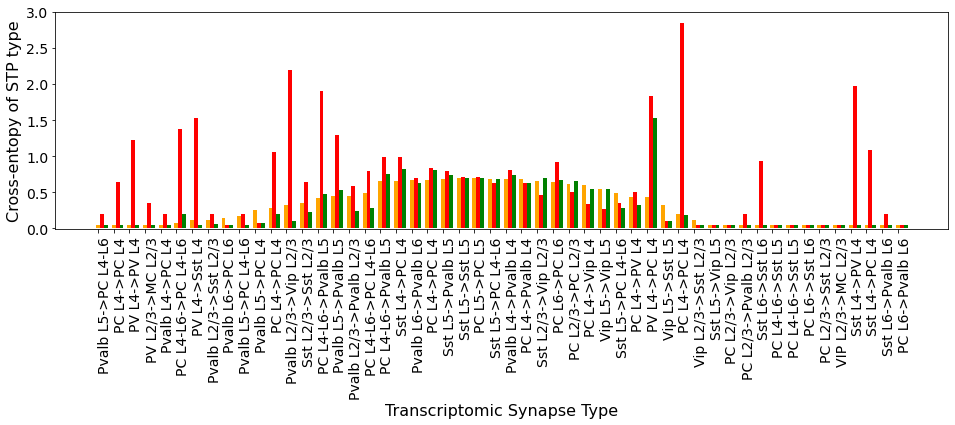

In [28]:
# Lyambda = 800, sigma = 1.0, Dn = 2
old=False
if old==False:

    R4 = R3[0].copy()

    # 0 combine p_test, p_train?
    nf=R4[0]['probab_y2'].shape[1]
    ns=R4[0]['probab_y2'].shape[0]
    p_data = R4[0]['probab_y2'].copy()
    p_test = np.zeros([ns,nf])
    p_train = np.zeros([ns,nf])
    n_test = np.zeros([ns,nf])
    n_train = np.zeros([ns,nf])

    for s in range(len(R4)):
        s_test = R4[s]['samples_y2test']
        s_train = R4[s]['samples_y2train']
        print('iteration cv ',s, ',  s_test length = ',len(s_test),',  s_train length = ',len(s_train))
        #p_test[s_test,:]=p_test[s_test,:]+R4[s]['probab_y2test']
        p_test[s_test,:]=R4[s]['probab_y2test'].copy()
        p_train[s_train,:]=p_train[s_train,:]+R4[s]['probab_y2train'].copy()
        n_test[s_test,:]=n_test[s_test,:]+1
        n_train[s_train,:]=n_train[s_train,:]+1
    #p_test=p_test/n_test  
    p_train=p_train/n_train 

    p_1 = np.concatenate([p_data[:,[i_tp]], p_test[:,[i_tp]], p_train[:,[i_tp]]], axis=1)
    #print(p_1.shape)
    
    # 1 estimate cross-entropy
    pp_l = [p_data.copy(), p_test.copy(), p_train.copy()]
    pmin=0.05
    p_data[p_data<pmin]=pmin
    p_data[p_data>1-pmin]=1-pmin
    do_restrict_pmin=False
    nt=2
    cs_1 = []
    for ipl,p_l in enumerate(pp_l):
        cs_i = np.zeros([p_data.shape[0],1])
        if do_restrict_pmin:
            p_l[p_l<pmin]=pmin
            p_l[p_l>1-pmin]=1-pmin
        print('ipl ',ipl)
        #print('p_l ',p_l[0:10,0:2])
        #print('p_data',p_data[0:10,0:2])
        for it in range(nt):
            
            if it==nt-1:
                cs_i=cs_i - (1-np.sum(p_l[:,0:nt-1],axis=1).reshape([-1,1]))*np.log(1 - np.sum(p_data[:,0:nt-1],axis=1).reshape([-1,1]))
                #print(np.sum(p_l[:,0:nt-1],axis=1))
            else: 
                cs_i=cs_i - p_l[:,[it]]*np.log(p_data[:,[it]])
            #print(cs_i.shape)    
                
        cs_1 = cs_1 + [cs_i]  
    #print('len_cs_1',len(cs_1))    
    cs_1 = np.concatenate(cs_1, axis=1)
    
    #print(cs_1)

    # 2 find names for syn_pair_types
    d3 = '/content/drive/My Drive/Colab Notebooks/'
    d3=''
    nms = pd.read_excel(d3+'names_of_synapses_ctx.xlsx')

    # 3 draw cross entropies
    f, ax =plt.subplots(figsize=(16, 4))

    n_ctx = nms.shape[0]
    print('number of cortical spt: ', n_ctx)
    istr = np.argsort(p_1[:n_ctx,0])
    labels=nms.loc[istr,0].values#np.tile(nms.loc[isrt,0].values.reshape([-1,1]), [1,Dn2])
    #data_s=p_1[istr,:].transpose()

    cs_1s=cs_1[istr,:]
    #plt.boxplot(data_s, whis=[5,95]) #,color='g')
    #orangc = np.array([255,94,19])/255
    #plt.bar(np.arange(len(R2i)), np.array(R2i), width=0.8 , color='orange')

    xDd = np.arange(n_ctx)
    plt.bar(xDd, cs_1s[:,0], width=0.25,color='orange')
    plt.bar(xDd+0.25, cs_1s[:,1], width=0.25,color='r')
    plt.bar(xDd+0.5, cs_1s[:,2], width=0.25,color='g')
    
    print( 'mean cross-entropy ctx: data, test, train = ',np.mean(cs_1s,axis=0))
    print( 'median cross-entropy ctx: data, test, train = ',np.median(cs_1s,axis=0))
    #
    print( 'mean cross-entropy all: data, test, train = ',np.mean(cs_1,axis=0))
    print( 'median cross-entropy all: data, test, train = ',np.median(cs_1,axis=0))

        #plt.boxplot(dyy0_s[isrt]) #,color='b')

    xD = np.arange(n_ctx)
    ax.set_xticks(xD)
    ax.set_xticklabels(nms.loc[istr,0].values)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
                rotation_mode="anchor")

    plt.ylim([-0.01,3])
    #plt.yscale('log')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Cross-entopy of STP type',fontsize=16)
    #plt.ylabel('Cross-entopy of STP class',fontsize=16)
    plt.xlabel('Transcriptomic Synapse Type',fontsize=16)
    
    # draw 2d diagram : cross entropy in pre- vs post- synaptic cell type axis
    #X2_an, X2_cl
    
    


**RESULTS CLASSIFICATION:**

***draw cross entropy of STP class prediction of synaptic pair types: pre- vs postsynaptic cell plane view***

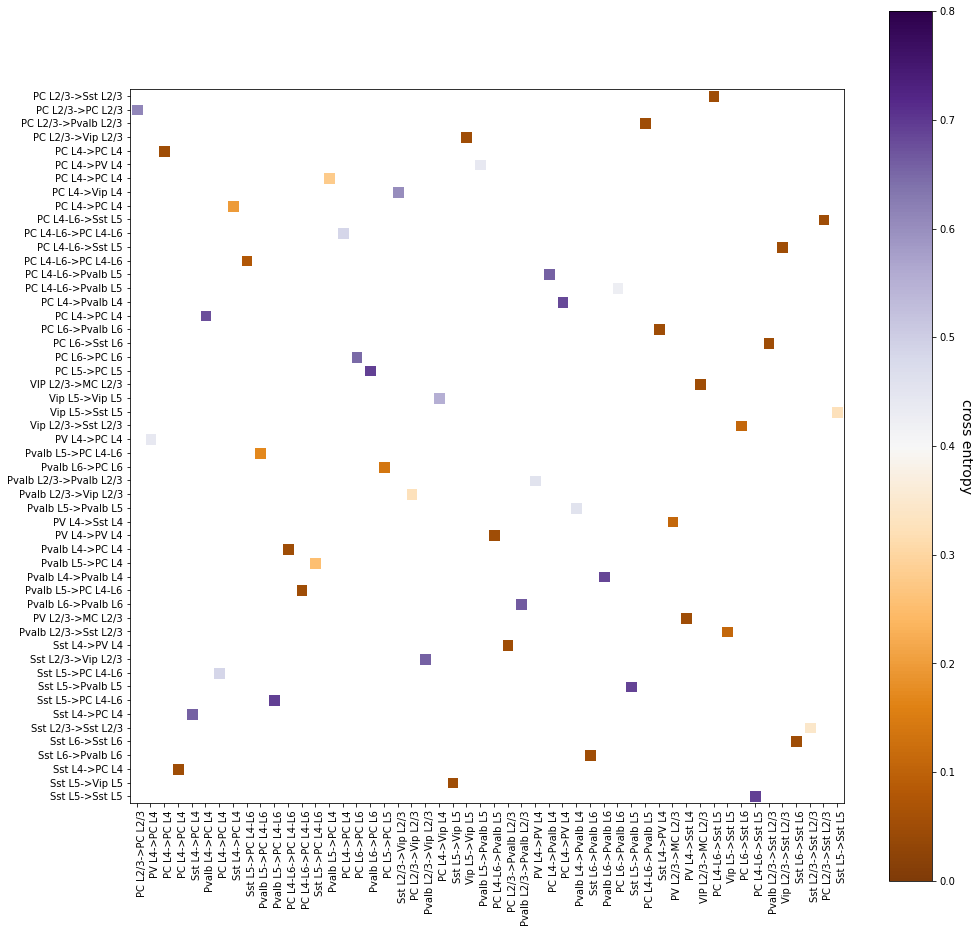

class_post                                              ex__post        \
subclass_post                                       ex_ctx__post         
vse__post                                                 ev_l23 ev_l4   
index_ds                                                    87.0  1.0    
class_pre subclass_pre vse__pre samples_pre                              
ex__pre   ex_ctx__pre  ev_l23   F2S4_151217_006_G01          NaN   NaN   
                                F2S4_160126_017_G01     0.610864   NaN   
                                F2S4_160329_004_G01          NaN   NaN   
                                F2S4_160701_041_F01          NaN   NaN   
                       ev_l4    F2S4_160113_007_C01          NaN   NaN   

class_post                                                                    \
subclass_post                                                                  
vse__post                                                                      
index_ds                                                 15.0 26.0 62.0 64.0   
class_pre subclass_pre vse__pre samples_pre                                    
ex__pre   ex_ctx__pre  ev_l23   F2S4_151217_006_G01       NaN  NaN  NaN  NaN   
                                F2S4_160126_017_G01       NaN  NaN  NaN  NaN   
                                F2S4_160329_004_G01       NaN  NaN  NaN  NaN   
                                F2S4_160701_041_F01       NaN  NaN  NaN  NaN   
                       ev_l4    F2S4_160113_007_C01  0.051293  NaN  NaN  NaN   

class_post                                                               ...  \
subclass_post                                                            ...   
vse__post                                                                ...   
index_ds                                            71.0 74.0 83.0 84.0  ...   
class_pre subclass_pre vse__pre samples_pre                              ...   
ex__pre   ex_ctx__pre  ev_l23   F2S4_151217_006_G01  NaN  NaN  NaN  NaN  ...   
                                F2S4_160126_017_G01  NaN  NaN  NaN  NaN  ...   
                                F2S4_160329_004_G01  NaN  NaN  NaN  NaN  ...   
                                F2S4_160701_041_F01  NaN  NaN  NaN  NaN  ...   
                       ev_l4    F2S4_160113_007_C01  NaN  NaN  NaN  NaN  ...   

class_post                                          inh__post                 \
subclass_post                                       sst__post                  
vse__post                                                 Sst                  
index_ds                                                 61.0 63.0 66.0 67.0   
class_pre subclass_pre vse__pre samples_pre                                    
ex__pre   ex_ctx__pre  ev_l23   F2S4_151217_006_G01  0.051293  NaN  NaN  NaN   
                                F2S4_160126_017_G01       NaN  NaN  NaN  NaN   
                                F2S4_160329_004_G01       NaN  NaN  NaN  NaN   
                                F2S4_160701_041_F01       NaN  NaN  NaN  NaN   
                       ev_l4    F2S4_160113_007_C01       NaN  NaN  NaN  NaN   

class_post                                                                    \
subclass_post                                                                  
vse__post                                                                      
index_ds                                            69.0 73.0 76.0 77.0 78.0   
class_pre subclass_pre vse__pre samples_pre                                    
ex__pre   ex_ctx__pre  ev_l23   F2S4_151217_006_G01  NaN  NaN  NaN  NaN  NaN   
                                F2S4_160126_017_G01  NaN  NaN  NaN  NaN  NaN   
                                F2S4_160329_004_G01  NaN  NaN  NaN  NaN  NaN   
                                F2S4_160701_041_F01  NaN  NaN  NaN  NaN  NaN   
                       ev_l4    F2S4_160113_007_C01  NaN  NaN  NaN  NaN  NaN   

class_post                                             

In [29]:
# draw 2d diagram : cross entropy in pre- vs post- synaptic cell type axis
    #X2_an, X2_cl
Dn2 = parameters['Dn2']    
X2_an_spt = X2_an[0::Dn2,:].copy()    
#print('spt annotations: ',X2_an_spt[0:2,:])    
X2_cl_spt = X2_cl[0::Dn2,:].copy()    
#print(X2_cl_spt[0:2,:])      
#print(X2_cl_spt.shape)
np_x2_cl_an = np.concatenate([X2_cl_spt,X2_an_spt],axis=1)
col = np.concatenate([classes_columns_train, annot_columns_train])
fX2_cl2_spt = pd.DataFrame(np_x2_cl_an,columns=col)
#print(fX2_cl2_spt.columns)
#print(fX2_cl2_spt.head())


# ge_columns_train, annot_columns_train, stp_columns_train, classes_columns_train
fX2_cl2_spt = pd.DataFrame(np.concatenate([X2_cl_spt,X2_an_spt, cs_1],axis=1),columns=np.concatenate([classes_columns_train, annot_columns_train,['ce_data','ce_test','ce_train']]))
#print(fX2_cl2_spt.head())

fX2_cl2_spt=fX2_cl2_spt.reset_index()

#fX2_cl2_spt.iloc[:,26]=[]
#fX2_cl2_spt=fX2_cl2_spt.loc[:,np.arange(fX2_cl2_spt.columns.shape[0])!=26] #drop_duplicates()
fX2_cl2_spt = fX2_cl2_spt.loc[:,~fX2_cl2_spt.columns.duplicated()]

fX2_cl2_spt.loc[fX2_cl2_spt.loc[:,'ex__pre']==0,'ex__pre']='inh'
fX2_cl2_spt.loc[fX2_cl2_spt.loc[:,'ex__post']==0,'ex__post']='inh'
#print(fX2_cl2_spt.head())
# df.pivot(index="lev1", columns=["lev2", "lev3"],values="values")
# fX2_cl3_spt = fX2_cl2_spt.pivot_table(index=['class_pre','subclass_pre','vse__pre','samples_pre'],
#                                       columns=['class_post', 'subclass_post','vse__post','index_ds'],values=['index','ce_test'])

# 2 find names for syn_pair_types, reshape cross entropy dataframe
d3 = '/content/drive/My Drive/Colab Notebooks/'
d3=''
nms = pd.read_excel(d3+'names_of_synapses_ctx.xlsx')
n_ctx = nms.shape[0]
fX2_cl3_spt_ctx = fX2_cl2_spt.loc[0:n_ctx-1,:].pivot_table(index=['class_pre','subclass_pre','vse__pre','samples_pre'],
                                      columns=['class_post', 'subclass_post','vse__post','index_ds'],values='ce_data',aggfunc=np.sum)

fX2_cl3_spt_hip = fX2_cl2_spt.loc[n_ctx:,:].pivot_table(index=['class_pre','subclass_pre','vse__pre','samples_pre'],
                                      columns=['class_post', 'subclass_post','vse__post','index_ds'],values='ce_data',aggfunc=np.sum)

#print(fX2_cl3_spt_ctx.head())


# Draw cross entropy on pre- vs postsynaptic cell type plane
if not ax:
        ax = plt.gca()

data =  fX2_cl3_spt_ctx.values
fX2_cl4r_spt_ctx = fX2_cl2_spt.loc[0:n_ctx-1,:].set_index(['class_pre','subclass_pre','vse__pre','samples_pre']).sort_index()
fX2_cl4c_spt_ctx = fX2_cl2_spt.loc[0:n_ctx-1,:].set_index(['class_post','subclass_post','vse__post','samples_post']).sort_index()
col_labels = nms[0][fX2_cl4c_spt_ctx['index']].values
row_labels = nms[0][fX2_cl4r_spt_ctx['index']].values

fig, ax = plt.subplots(1, 1, figsize=(16, 16))        
# Plot the heatmap
im = ax.imshow(data, cmap="PuOr", vmin=0, vmax=0.8) #, **kwargs)

# Create colorbar
cbarlabel = 'cross entropy'
#cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize =14)

# Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)
#for spine in ['top', 'right', 'left', 'bottom']:
#    ax.spines[spine].set_visible(False)
    
    # Show all ticks and label them with the respective list entries.
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(col_labels)
ax.set_yticklabels(row_labels)
#print(col_labels)

    # Let the horizontal axes labeling appear on top.
#ax.tick_params(top=True, bottom=False,
#                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")    

ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

#  matplotlib.pyplot.figure.add_axes(rect)
dx=0.62
dy=0.1

dt = fX2_cl3_spt_ctx.index.to_frame().values[:,0]
pos = [0.126,0.78,dx,dy]
cat = ['inh__pre', 'ex__pre']
#fig, sbs = add_bar(fig,dt,pos,categories=cat) 

dt = fX2_cl3_spt_ctx.index.to_frame().values[:,2]
pos[1] = pos[1] - dy/7.5
#fig,sbs1 = add_bar(fig,dt,pos,cmap="PuOr") 

#print(sbs1,sbs)

dx=0.1
dy=0.624
dt = fX2_cl3_spt_ctx.columns.to_frame().values[:,0]
pos = [0.7145,0.19,dx,dy]
##cat = ['inh__pre', 'ex__pre']
#fig,sbs = add_bar(fig,dt,pos,rotation=90) 



dt = fX2_cl3_spt_ctx.columns.to_frame().values[:,2]
pos[0] = pos[0] - dx/7.5
#fig,sbs1 = add_bar(fig,dt,pos,cmap="PuOr",rotation=90) 

#print(sbs1,sbs)


#plt.tight_layout()
plt.show()


fX2_cl3_spt_ctx.head()